# BIOGENESYS

## Avance 1


In [1]:
#Cargar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import geopandas as gpd
from shapely.geometry import Polygon
import os


In [2]:
#Importar Archivo

Ruta_de_datos= ("/Users/ginacorrea/Downloads/ProyectoFinalPython/data_latinoamerica.csv")

In [3]:
#Lectura del archivo

data=pd.read_csv(Ruta_de_datos)

In [4]:
#Visualizacion

data

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

In [5]:
#Visualizo la cantidad de filas y columnas
data.shape

(12216057, 50)

In [6]:
#Mostrar el detalle del DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [7]:
#Creo una lista de los paises de interes para la expansion 

paises_seleccionados=["Colombia","Argentina","Chile","Mexico","Peru","Brazil"]


data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


In [8]:
#observo la cantidad de filas y columnas
data_latinoamerica.shape

(11970289, 50)

In [9]:
#Observar la cantidad de nulos
data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [10]:
#Se observan cuantos datos tiene cada pais
data_latinoamerica.country_name.value_counts()

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64

In [11]:
#Obtengo localizaciones especificas y repite la informacion para todos los paises, es un indicio que debo filtrar por location key
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [12]:
#Filtro por location key para obtener 1 registro por pais
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]

data_latinoamerica_paises.shape

(5946, 50)

In [13]:
# Convertir la columna "date" a formato datetime si no está en ese formato
#data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.loc[:, 'date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Filtrar por fecha (mayor que "2021-01-01")
fecha_limite = pd.to_datetime("2021-01-01")
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date'] > fecha_limite]

In [14]:
#visualizamos el filtrado de paises
data_latinoamerica_paises_fecha.shape

(3744, 50)

In [15]:
# Contamos Valores nulos
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum() > 0]
#visualizamos
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [16]:
#Valores nulos 
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [17]:
# Contar valores nulos en cada columna
valores_nulos = data_latinoamerica_paises_fecha.isnull().sum()
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [18]:
# Usar bucle For para completar nulos
for pais in paises_seleccionados:
    # Usar .loc para asignar valores sin generar la advertencia
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_confirmed"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_confirmed"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_confirmed"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_deceased"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_deceased"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_deceased"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_confirmed"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_confirmed"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_confirmed"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_deceased"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_deceased"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_deceased"].mean()) 
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"].mean())

# Relleno de Nan con 0
data_latinoamerica_paises_fecha["new_recovered"] = data_latinoamerica_paises_fecha["new_recovered"].fillna(0)
data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"].fillna(0)
data_latinoamerica_paises_fecha["cumulative_recovered"] = data_latinoamerica_paises_fecha["cumulative_recovered"].fillna(0)


/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/4223956484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha["new_recovered"] = data_latinoamerica_paises_fecha["new_recovered"].fillna(0)
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/4223956484.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administere

In [19]:
#9_ Mostrar las primeras filas del dataset
print(data_latinoamerica_paises_fecha.head())



    location_key                 date country_code country_name  \
367           AR  2021-01-02 00:00:00           AR    Argentina   
368           AR  2021-01-03 00:00:00           AR    Argentina   
369           AR  2021-01-04 00:00:00           AR    Argentina   
370           AR  2021-01-05 00:00:00           AR    Argentina   
371           AR  2021-01-06 00:00:00           AR    Argentina   

     new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
367         7767.0         166.0             1670634.0              46688.0   
368         4934.0         157.0             1675568.0              46845.0   
369        13953.0         157.0             1689521.0              47002.0   
370        14085.0         160.0             1703606.0              47162.0   
371        14496.0         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...

In [20]:
#10_Guardar el DataFrame df_filtrado en un archivo CSV
data_latinoamerica_paises_fecha.to_csv('DatosFinalesFiltrado.csv', index=False)

In [21]:
#11/12 uso de funcion .describe para obtener estadisticas de las columnas rellenadas y filtradas
estadisticas = data_latinoamerica_paises_fecha.describe()
print(estadisticas)



       new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9

In [22]:
for i in  data_latinoamerica_paises_fecha.columns:
    print(i)
    print(data_latinoamerica_paises_fecha[i].describe())
    print('------')


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------
date
count                    3744
unique                    624
top       2021-01-02 00:00:00
freq                        6
Name: date, dtype: object
------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
------
cumulati

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/4209938084.py:3: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(data_latinoamerica_paises_fecha[i].describe())


## Avance 2

In [23]:
#Crear una funcion que solo muestre los valores numericos y no los valores categoricos


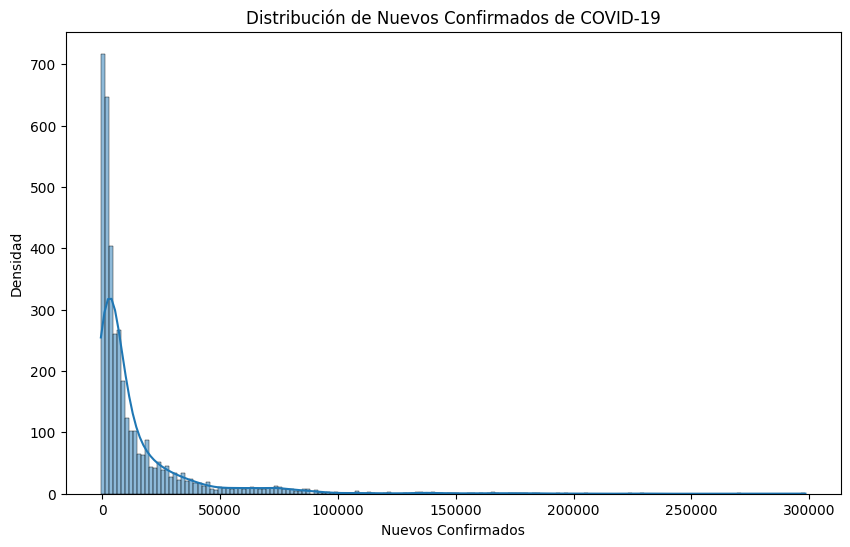

In [24]:
# Histograma y gráfico de densidad para new_confirmed
plt.figure(figsize=(10, 6))
sns.histplot(data=data_latinoamerica_paises_fecha, x='new_confirmed', kde=True)
plt.title('Distribución de Nuevos Confirmados de COVID-19')
plt.xlabel('Nuevos Confirmados')
plt.ylabel('Densidad')
plt.show()


En este gráfico podemos observar que existe una correlación lógica entre la densidad poblacional y los nuevos confirmados, lo cual nos dice que el covid no discriminaba personas bajo ningún factor, raza u origen. 

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1796831092.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_latinoamerica_paises_fecha, x='country_name', y='cumulative_vaccine_doses_administered', ci=None)


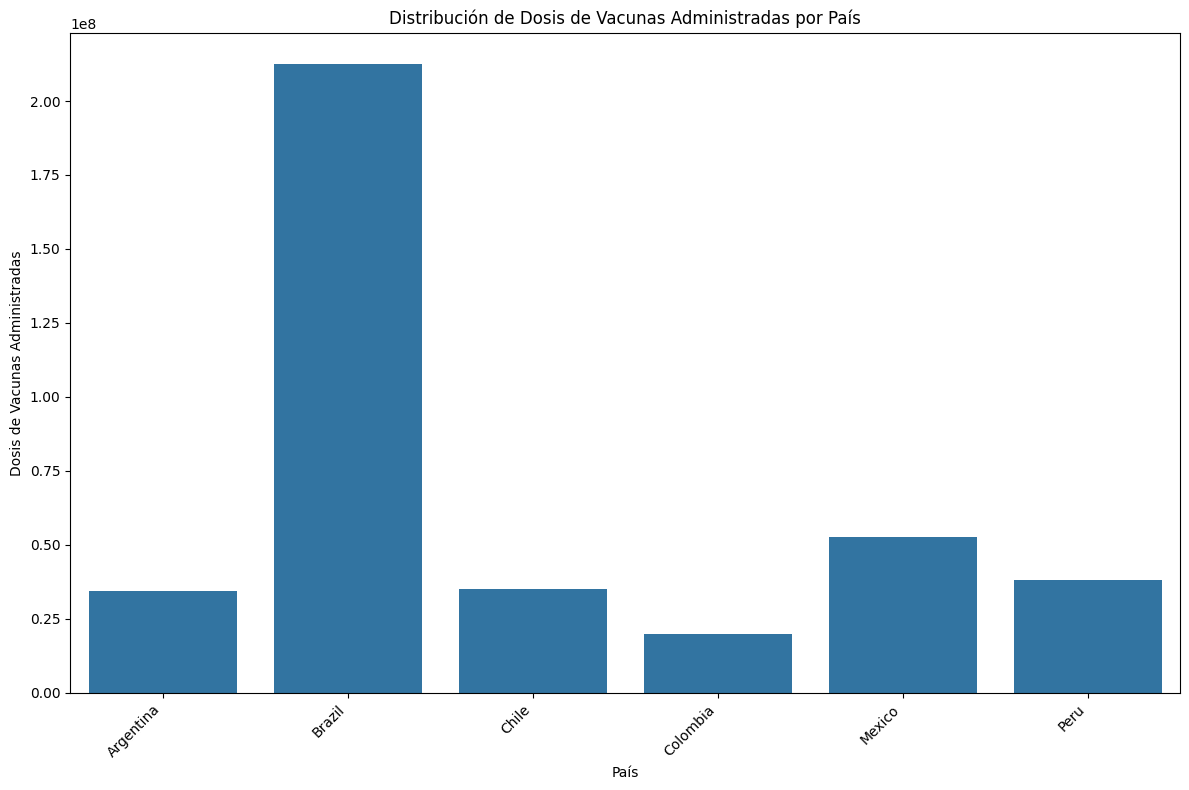

In [25]:
#Distrubicion de dosis de  vacunas administradas por pais 
plt.figure(figsize=(12, 8))
sns.barplot(data=data_latinoamerica_paises_fecha, x='country_name', y='cumulative_vaccine_doses_administered', ci=None)
plt.title('Distribución de Dosis de Vacunas Administradas por País')
plt.xlabel('País')
plt.ylabel('Dosis de Vacunas Administradas')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustamos el diseño para evitar cortar las etiquetas
plt.show()

*En este grafico observamos que Brazil destaca como el país con la mayor cantidad de dosis de vacunas aplicadas, indicando un esfuerzo notable en su programa de vacunación contra la COVID-19. México se posiciona en el segundo lugar en términos de dosis aplicadas, mostrando también un compromiso considerable en la vacunación de su población. Perú aparece como el tercer país con más dosis aplicadas, lo que indica un progreso notable en su campaña de vacunación. Chile y Argentina ambos países muestran una cantidad similar de dosis aplicadas, lo que los sitúa en una posición intermedia en comparación con los otros países analizados. Esto sugiere una respuesta efectiva, pero quizás con desafíos propios en cuanto a la disponibilidad y distribución de vacunas. Colombia se encuentra en la posición más baja en términos de dosis de vacunas aplicadas. Esto podría indicar desafíos en la distribución o acceso a las vacunas en comparación con otros países de la región.*

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1981804995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1981804995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1981804995.py:6: SettingWit

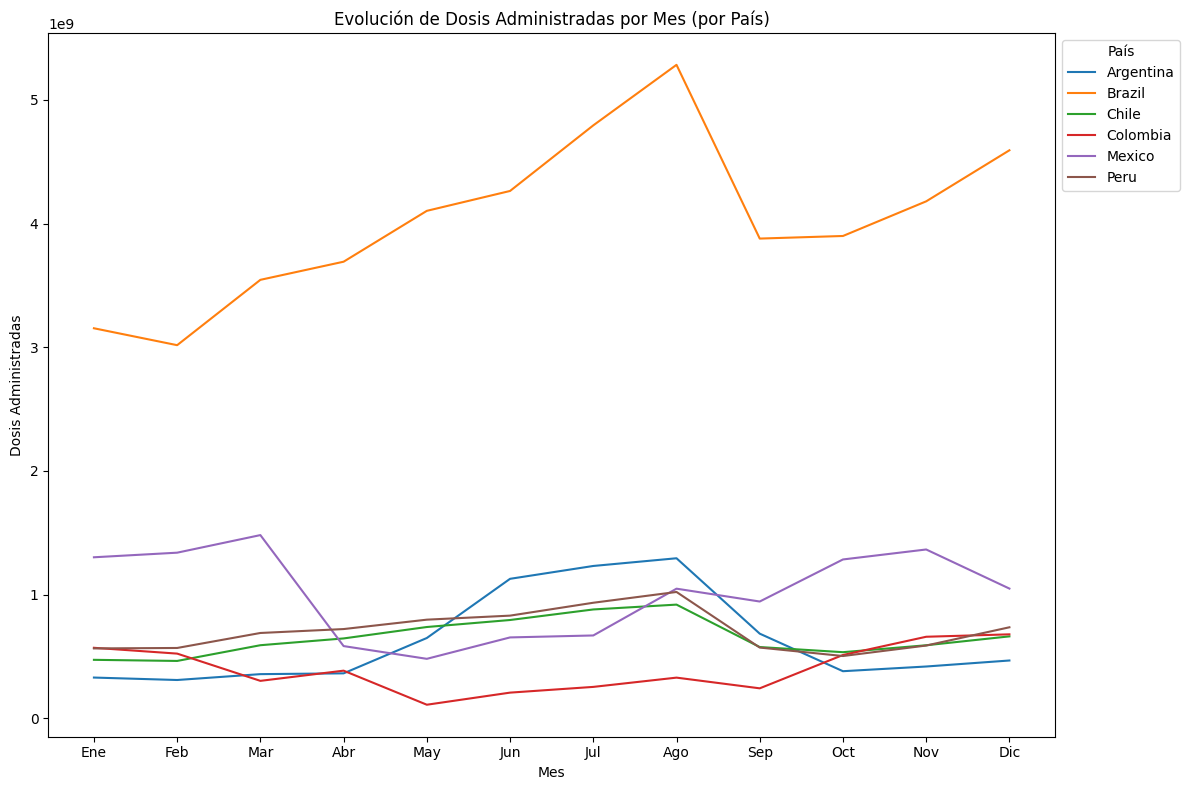

In [26]:

# Suponiendo que tienes una columna 'date' que contiene las fechas en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Extraer el mes y el año de la fecha
data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month

# Agrupar por país, mes y año, sumando las dosis administradas
grouped_data = data_latinoamerica_paises.groupby(['country_name', 'year', 'month'])['cumulative_vaccine_doses_administered'].sum().reset_index()

# Crear el gráfico de línea sin sombras
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='month', y='cumulative_vaccine_doses_administered', hue='country_name', palette='tab10', ci=None)
plt.title('Evolución de Dosis Administradas por Mes (por País)')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()




Podemos observar que mientras todos los países mantuvieron una constante en la dosis suministradas cercana a 1, brasil tuvo que suministrar 3 y hasta 4 veces mas teniendo un pico en el mes de agosto.

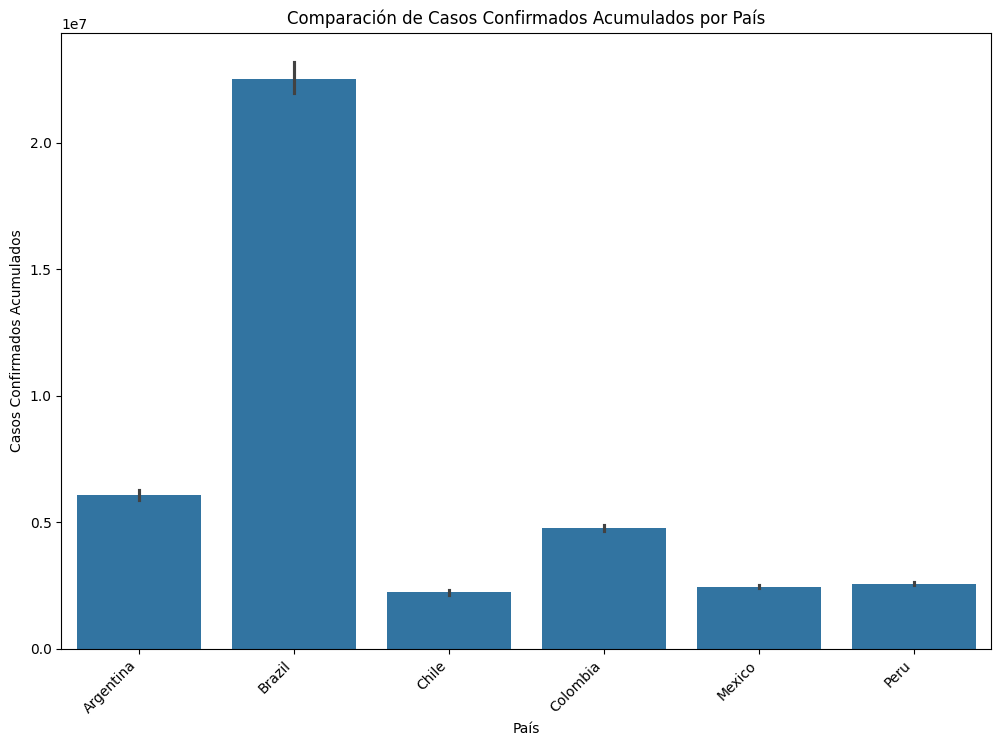

In [27]:
# Gráfico de barras para comparar cumulative_confirmed por país
plt.figure(figsize=(12, 8))
sns.barplot(data=data_latinoamerica_paises_fecha, x='country_name', y='cumulative_confirmed')
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de Casos Confirmados Acumulados por País')
plt.xlabel('País')
plt.ylabel('Casos Confirmados Acumulados')
plt.show()

*Brazil tiene la barra más alta, seguida de Argentina, luego Colombia, México y Perú en el mismo nivel, y finalmente Chile. Esta información sugiere que Brazil tiene el mayor número de casos confirmados acumulados en comparación con los otros países mencionados. Es logico por la cantidad de poblacion que tiene y su politica frente al covid 19.*

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1390659160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1390659160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/1390659160.py:6: SettingWit

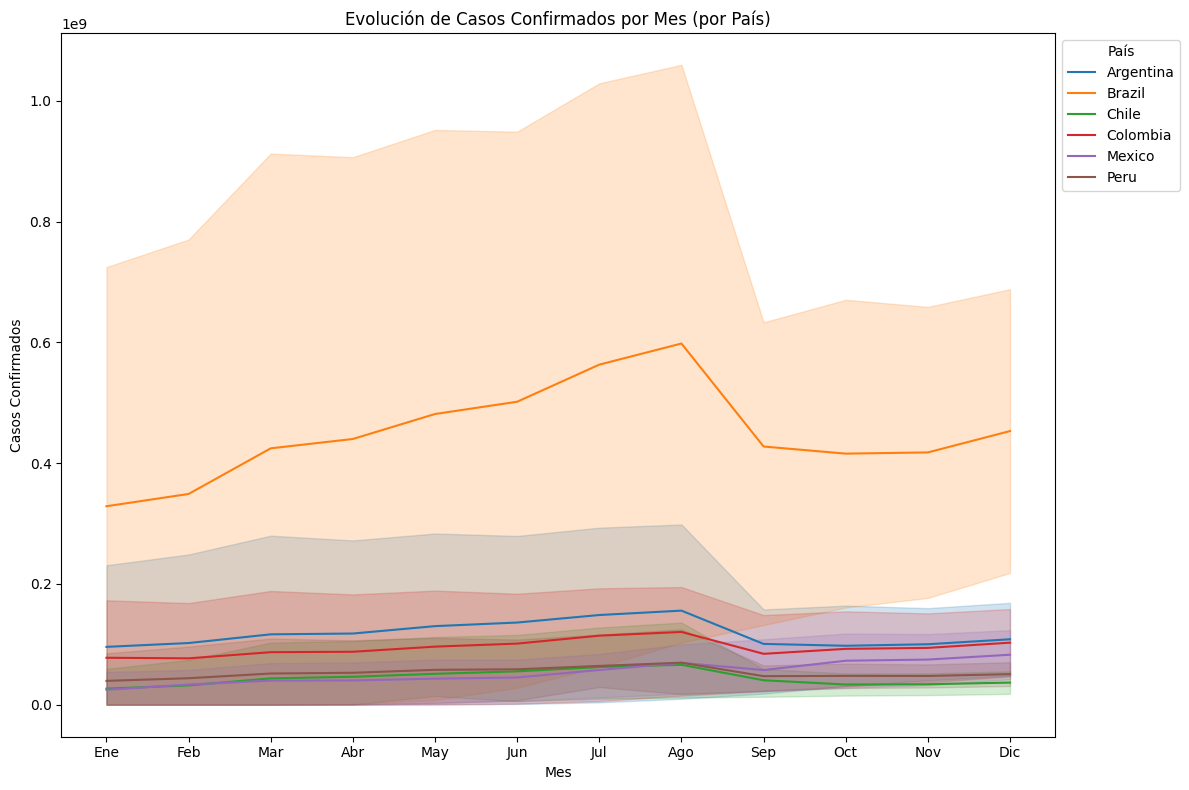

In [28]:

# Suponiendo que tienes una columna 'date' que contiene las fechas en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Extraer el mes y el año de la fecha
data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month

# Agrupar por país, mes y año, sumando los casos confirmados
grouped_data = data_latinoamerica_paises.groupby(['country_name', 'year', 'month'])['cumulative_confirmed'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='month', y='cumulative_confirmed', hue='country_name', palette='tab10')
plt.title('Evolución de Casos Confirmados por Mes (por País)')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()



*El pico más alto en Brasil refleja una mayor magnitud de la pandemia en ese país en comparación con otros países representados en el gráfico. Esto podría deberse a varios factores, como la densidad de población, la infraestructura de salud, las medidas de control implementadas y la capacidad de pruebas y seguimiento.*

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/2489771681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/2489771681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/2489771681.py:6: SettingWit

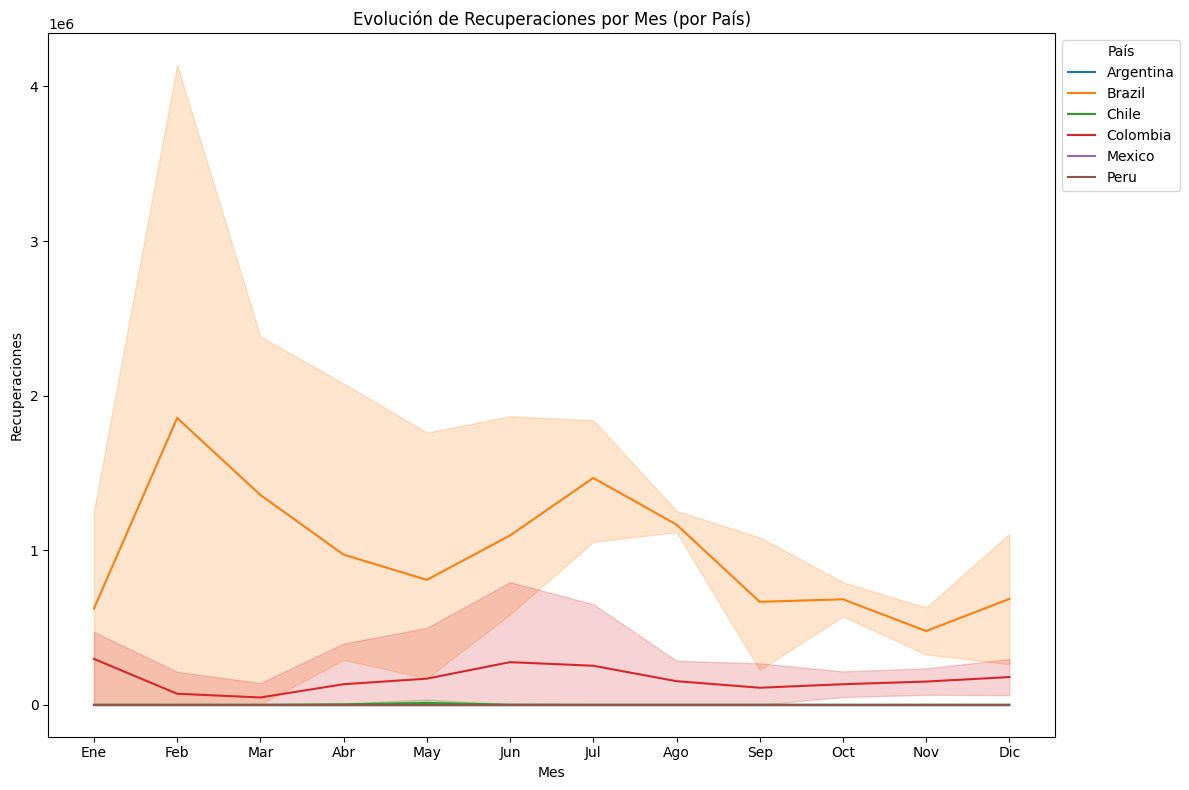

In [29]:

# columna 'date' que contiene las fechas en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Extraer el mes y el año de la fecha
data_latinoamerica_paises['year'] = data_latinoamerica_paises['date'].dt.year
data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month

# Agrupar por país, mes y año, sumando las recuperaciones
grouped_data = data_latinoamerica_paises.groupby(['country_name', 'year', 'month'])['new_recovered'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='month', y='new_recovered', hue='country_name', palette='tab10')
plt.title('Evolución de Recuperaciones por Mes (por País)')
plt.xlabel('Mes')
plt.ylabel('Recuperaciones')
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()



*Al observar el gráfico que muestra la evolución de recuperaciones por mes, es importante señalar que solo se tienen registros para Brasil y Colombia en el conjunto de datos analizado. La ausencia de datos de otros países como Argentina, México, Perú y Chile podría deberse a diversas razones, como diferencias en la disponibilidad y precisión de los registros de recuperaciones entre países, variaciones en los sistemas de reporte de datos de salud pública, y posibles discrepancias en la recolección o actualización de la información a lo largo del tiempo. La falta de datos de algunos países no necesariamente refleja una ausencia de recuperaciones, sino más bien una falta de disponibilidad de datos en el conjunto específico utilizado para este análisis*

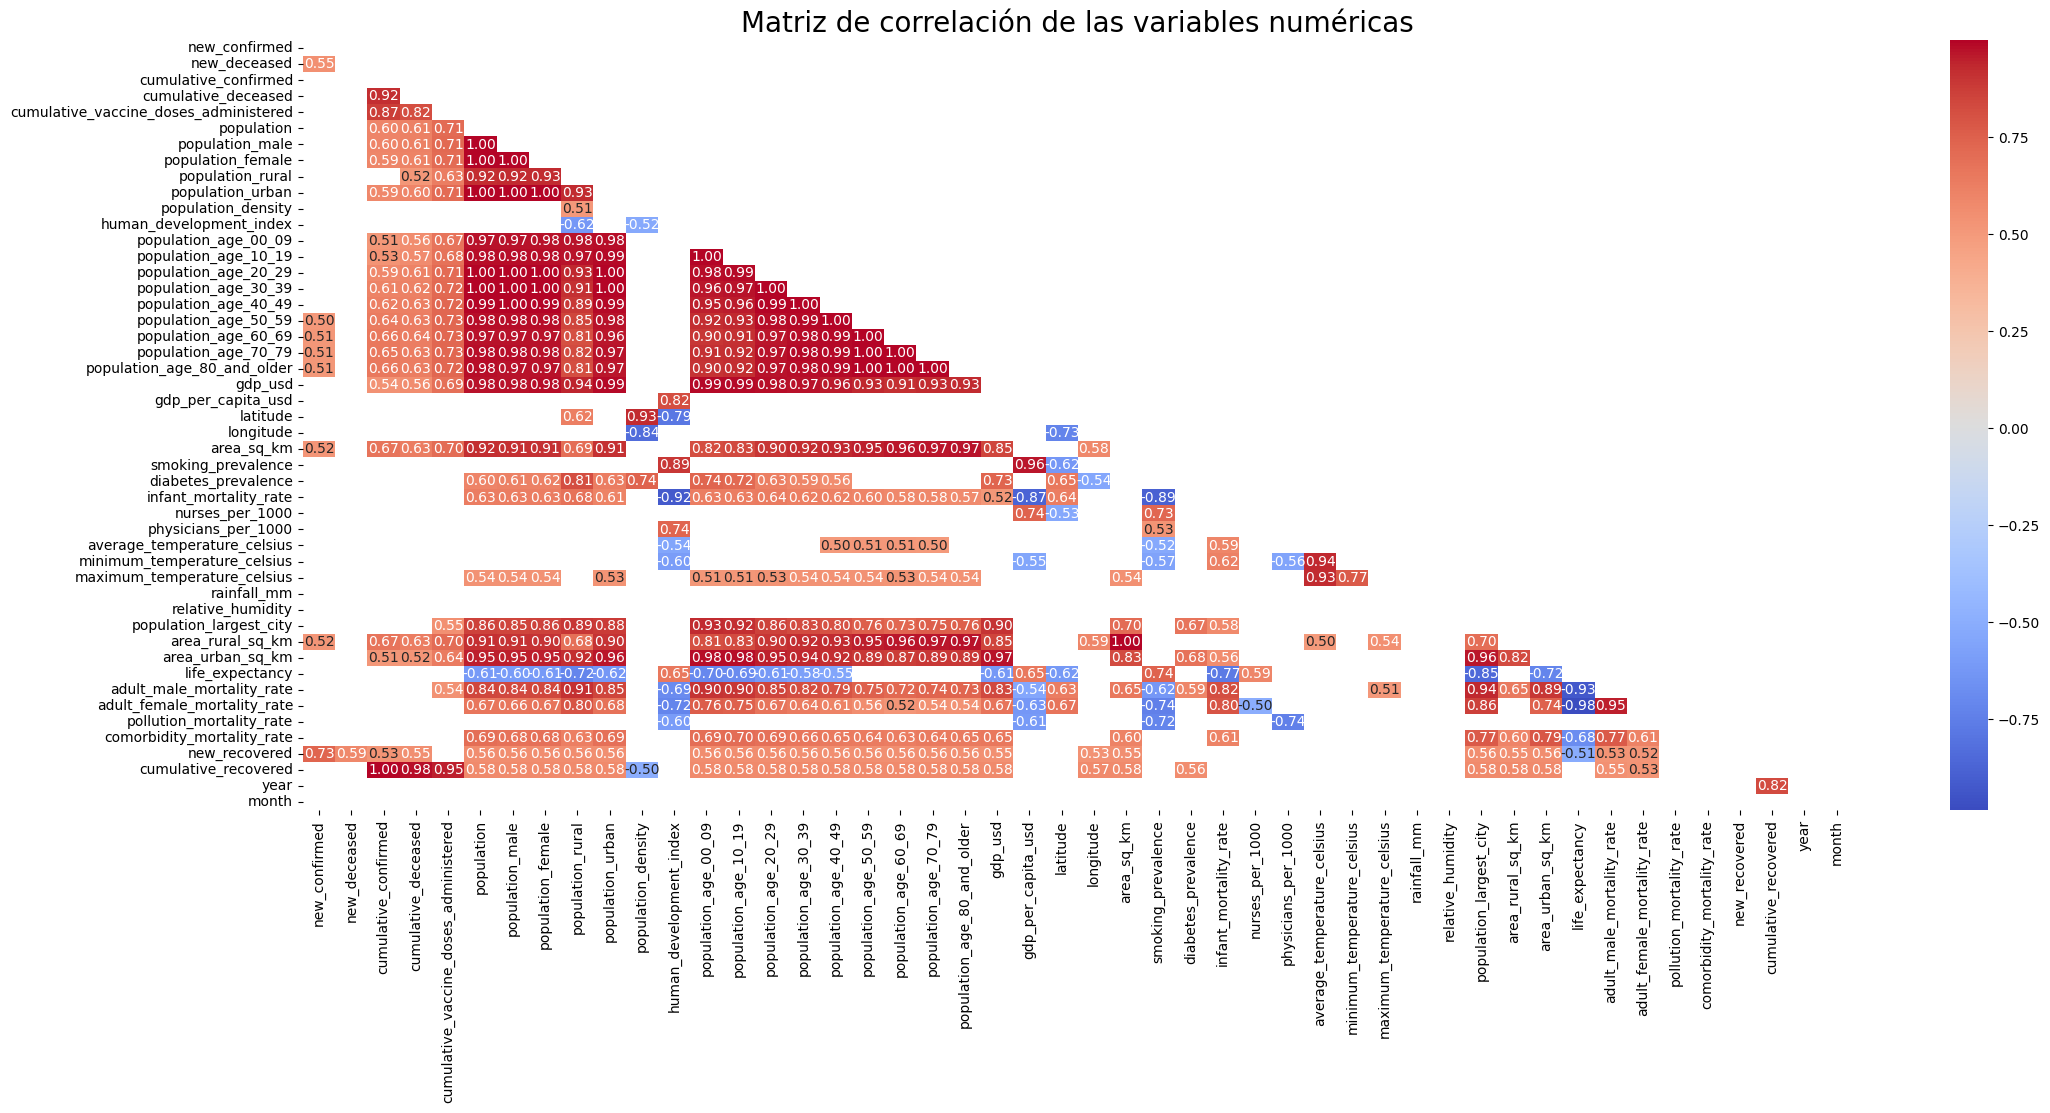

In [30]:
# Seleccionar columnas numéricas
columnas_numericas = data_latinoamerica_paises.select_dtypes(include=['float', 'int']).columns

# Calcular la matriz de correlación
correlation_matrix = data_latinoamerica_paises[columnas_numericas].corr()

# Crear una máscara para mostrar el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Filtrar valores de correlación superiores a 0.5 (o cualquier otro umbral)
correlation_matrix_filtered = correlation_matrix[abs(correlation_matrix) > 0.5]

# Creación del gráfico
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

Esta Matriz de correlacion se puede observar que poblacion tiene mas relacion con los casos, es logico por el contexto. La mayoria de los contagiados vive en zonas urbanas y se puede observar la mortalidad de cada uno de los grupos etarios.

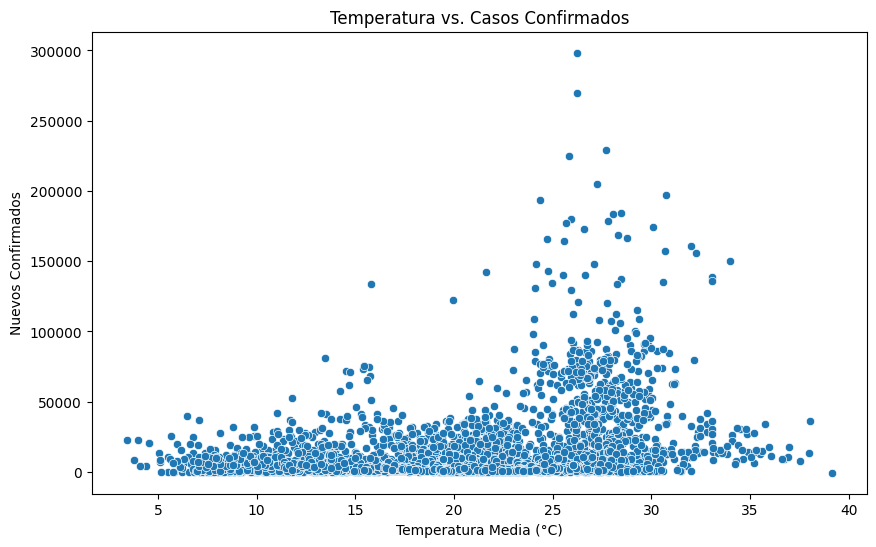

In [31]:
# Diagrama de dispersión de temperatura media contra casos confirmados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_latinoamerica_paises_fecha, x='average_temperature_celsius', y='new_confirmed')
plt.title('Temperatura vs. Casos Confirmados')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevos Confirmados')
plt.show()

Viendo este gráfico podemos deducir que el covid-19 no está asociado a una temperatura puntual afectando a todas las regiones por igual. El mayor volumen que vemos entre los 25 y 35 grados podrían decirnos otra cosa, pero si tenemos en cuenta información de otras gráficas y conocimiento general sabemos que Brasil, el país con mayor densidad poblacional y por ende con mayor cantidad de casos tiene una temperatura promedio que oscina entre estos números por lo cual podemos asociarlo en ese sentido. Una vez mas, no encontramos un patrón bien definido para segmentar el covid-19. Una recomendacion seria comparar este grafico con la densidad poblacional.

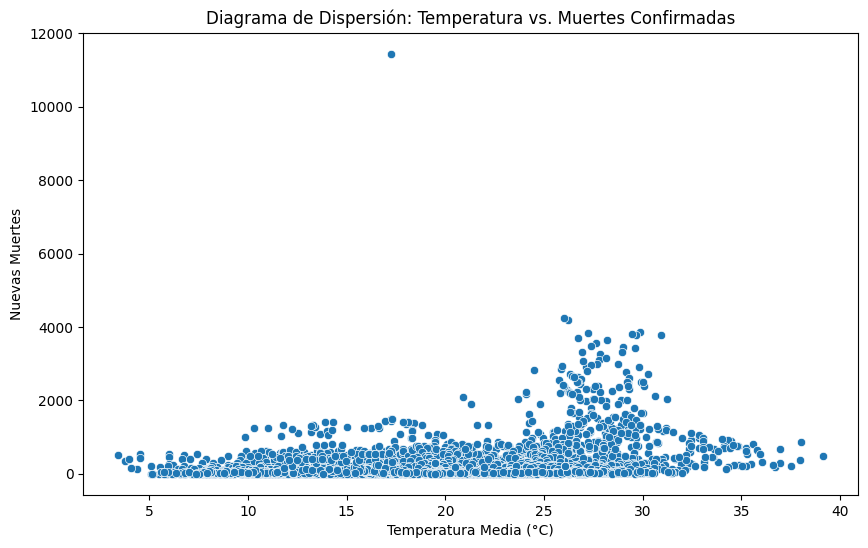

In [32]:
# Diagrama de dispersión de temperatura media contra muertes confirmadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_latinoamerica_paises_fecha, x='average_temperature_celsius', y='new_deceased')
plt.title('Diagrama de Dispersión: Temperatura vs. Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Nuevas Muertes')
plt.show()

Como observamos en el grafico anterior, las muertes no estan asociadas a una temperatura especifica, tambien vemos que en el rango de 25 grados y 30 grados, lo asociamos a la densidad poblacional de Brasil.

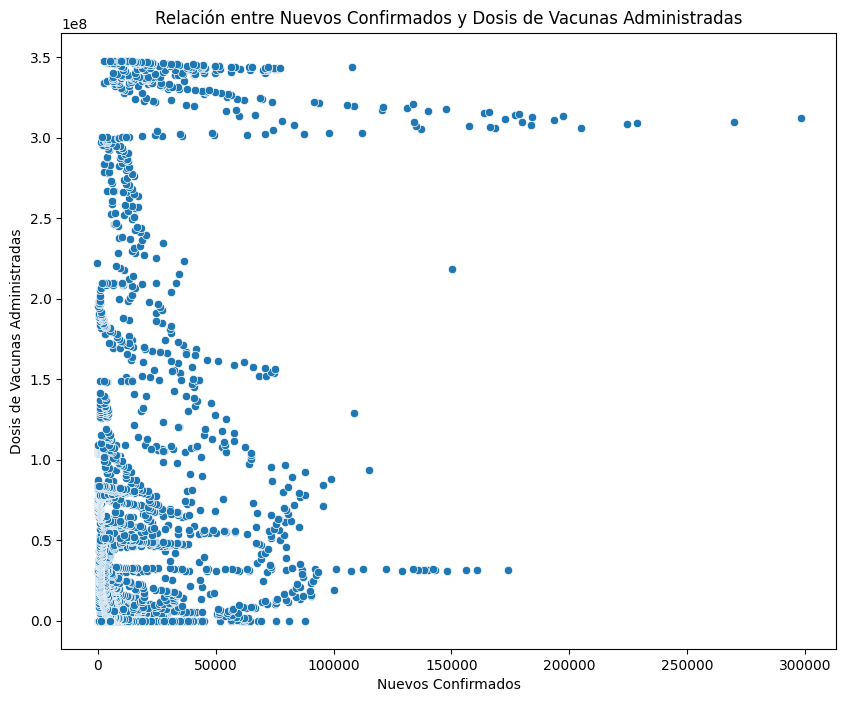

In [33]:
# Gráfico de dispersión para relacionar new_confirmed y cumulative_vaccine_doses_administered
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_latinoamerica_paises_fecha, x='new_confirmed', y='cumulative_vaccine_doses_administered')
plt.title('Relación entre Nuevos Confirmados y Dosis de Vacunas Administradas')
plt.xlabel('Nuevos Confirmados')
plt.ylabel('Dosis de Vacunas Administradas')
plt.show()

En este diagrama se observa que a menor cantidad de dosis mayores contagios a medida que aumenta la cantidad de dosis disminuyen los casos, a excepcion de Brazil que mantuvo alto el numero de nuevos confirmados aun aplicando 3 dosis, teniendo en cuenta graficos anteriores podemos ver que Brazil es pais que mas vacunas ha aplicado. 

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_83517/753351276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['date'] = pd.to_datetime(data_latinoamerica_paises_fecha['date'], errors='coerce')


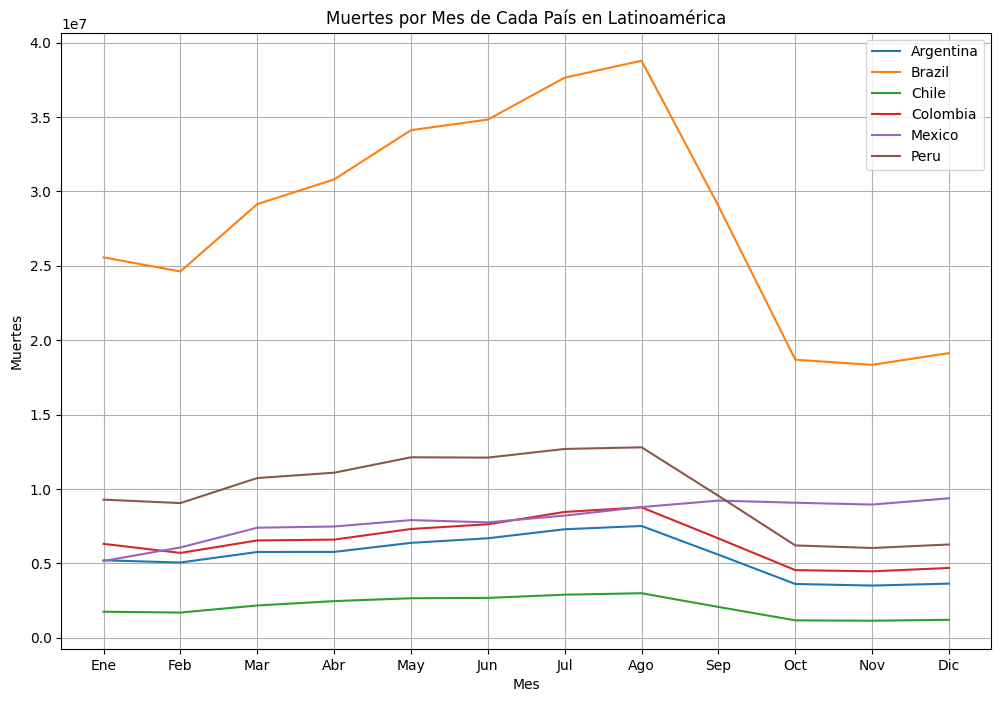

In [34]:

# Convertir la columna 'date' a tipo datetime 
data_latinoamerica_paises_fecha['date'] = pd.to_datetime(data_latinoamerica_paises_fecha['date'], errors='coerce')

# Filtrar filas donde la columna 'date' no sea nula
data_latinoamerica_paises_fecha = data_latinoamerica_paises_fecha.dropna(subset=['date'])

# Agrupar por país y mes, sumando las muertes
df_grouped = data_latinoamerica_paises_fecha.groupby([data_latinoamerica_paises_fecha['date'].dt.month, 'country_name']).agg({'cumulative_deceased': 'sum'}).reset_index()
df_grouped.rename(columns={'date': 'month'}, inplace=True)

# Crear un gráfico de líneas por país
plt.figure(figsize=(12, 8))
for country in df_grouped['country_name'].unique():
    data_country = df_grouped[df_grouped['country_name'] == country]
    plt.plot(data_country['month'], data_country['cumulative_deceased'], label=country)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Muertes')
plt.title('Muertes por Mes de Cada País en Latinoamérica')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()


*El gráfico de líneas que representa la evolución de muertes por mes en países de Latinoamérica revela patrones interesantes en relación 
con la situación de la pandemia en la región. Se observa que Brazil experimentó una disminución considerable en el número de muertes desde 
agosto hasta octubre. Este descenso podría estar relacionado con diversas medidas implementadas, como campañas de vacunación, restricciones de movilidad 
y medidas de control sanitario.
En contraste, otros países como Argentina, Chile, Colombia y Perú también muestran una disminución en las muertes durante el mismo período.
Esta tendencia generalizada sugiere que estas naciones también implementaron estrategias efectivas para contener la propagación del virus y reducir 
la mortalidad. En cambio Mexico subio un poco cuando todos los demás bajaron las muertes*

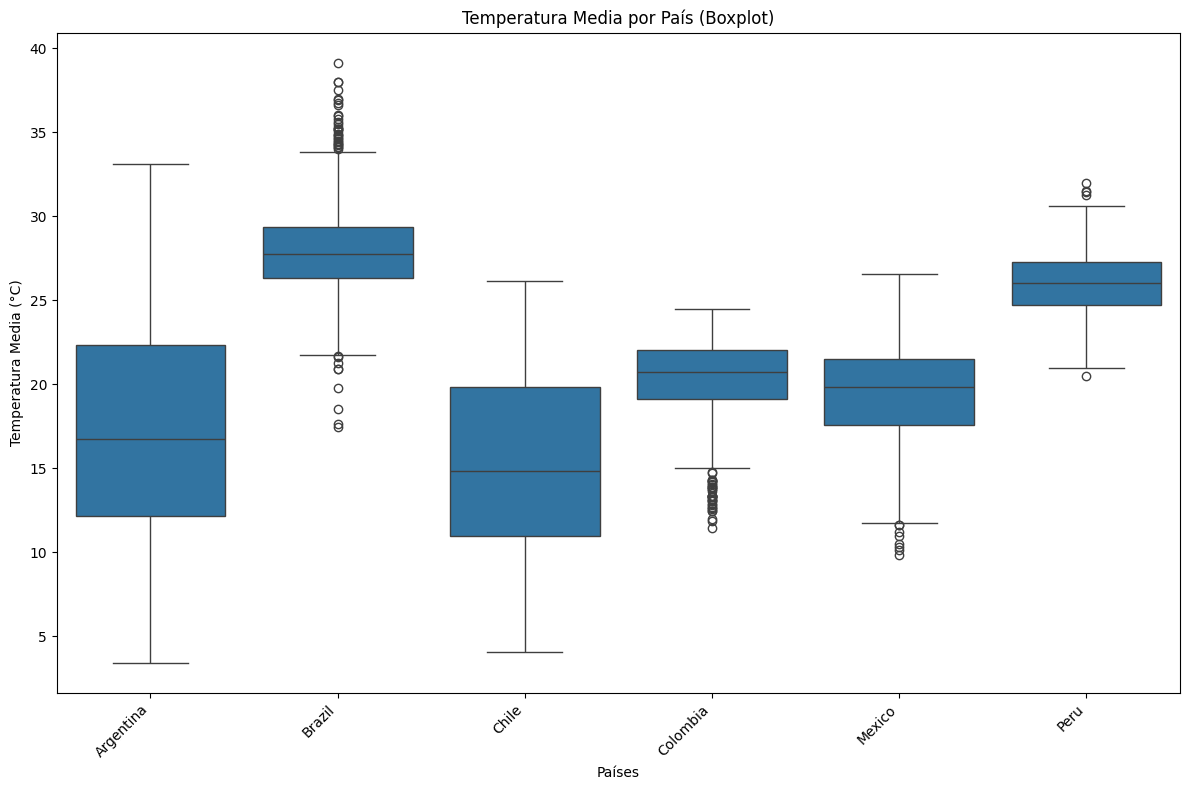

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_latinoamerica_paises_fecha, x='country_name', y='average_temperature_celsius')
plt.title('Temperatura Media por País (Boxplot)')
plt.xlabel('Países')
plt.ylabel('Temperatura Media (°C)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas y alinearlas a la derecha para mejor legibilidad
plt.tight_layout()
plt.show()

Podemos observar que las temperaturas medias de cada uno de los países no han tenido una influencia preponderante en la pandemia. Países como Argentina y Chile que comparten latitudes tienen prácticamente la misma media de temperatura , con un rango mucho mas amplio que los otros paises.

In [36]:


# Definir las columnas a excluir
columnas_excluir = ['location_key', 'date', 'country_code', 'latitude', 'longitude', 
                    'adult_male_mortality_rate', 'adult_female_mortality_rate',
                    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older','year','month']

# Obtener todas las columnas excepto las columnas a excluir
columnas_variables = [col for col in df.columns 
                      if col != 'country_name' and col not in columnas_excluir]

# Definir una paleta de colores personalizada
colores = sns.color_palette('Set1', n_colors=len(columnas_variables))

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre las variables y crear un gráfico de barras para cada una
for i, variable in enumerate(columnas_variables):
    plt.figure(figsize=(12, 6))  # Tamaño del gráfico
    
    # Usar un color diferente de la paleta para cada gráfico
    color = colores[i]
    
    sns.barplot(data=df, x='country_name', y=variable, color=color)
    plt.title(f'Gráfico de Barras: {variable} por País')
    plt.xlabel('Países')
    plt.ylabel(variable)  # Nombre de la variable en el eje y
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización

plt.tight_layout()
plt.show()



NameError: name 'df' is not defined

Por lo visto anteiormente brasil contiene los parametros mas altos, seguido por Mexico. Las columnas mas alarmantes son las de Recovered , ya que, los otros paises no tienen constancia de la recoleccion de los datos. Estan equitativos en cuanto a que la mayoria de los que tenian mas de una enfermedad de base tienen alta probabilidad de mortalidad, la expectativa de vida ronda entre los 75 y 80 años en todos los paises analizados, los mayores contagios estan en las zonas urbanas, chile cuenta con la mayor cantidad de enfermeras y argentina con la mayor de medicos. 

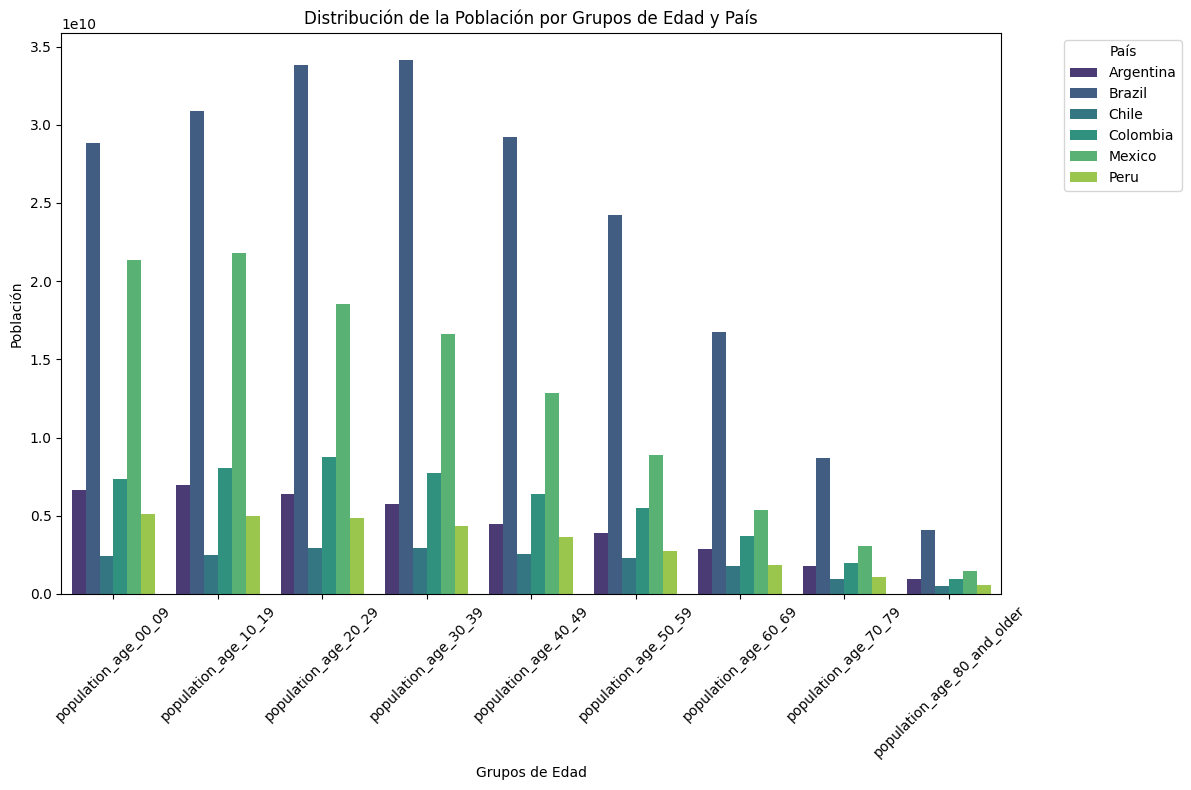

In [ ]:
#Distribucion de la poblacion por grupos de edad y pais 
# Lista de las columnas de grupos de edad
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                 'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Supongamos también que tienes una columna 'country_name' que indica el país para cada fila

# Crear un DataFrame auxiliar con las sumas de cada grupo de edad por país
data_edad_pais = data_latinoamerica_paises.groupby('country_name')[columnas_edad].sum().reset_index()

# Convertir el DataFrame en formato largo para usar en Seaborn
data_edad_pais_long = data_edad_pais.melt(id_vars='country_name', value_vars=columnas_edad, var_name='Grupo_Edad', value_name='Poblacion')

# Crear el gráfico de barras apiladas con país como hue
plt.figure(figsize=(12, 8))
sns.barplot(data=data_edad_pais_long, x='Grupo_Edad', y='Poblacion', hue='country_name', palette='viridis')
plt.title('Distribución de la Población por Grupos de Edad y País')
plt.xlabel('Grupos de Edad')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()



A simple vista se puede observar que la densidad poblacional se centra en el rango etario entre los 10 años a los 49 años,como hemos estado observando Brasil lleva la delatera con la cantidad de habitantes seguido por Mexico.

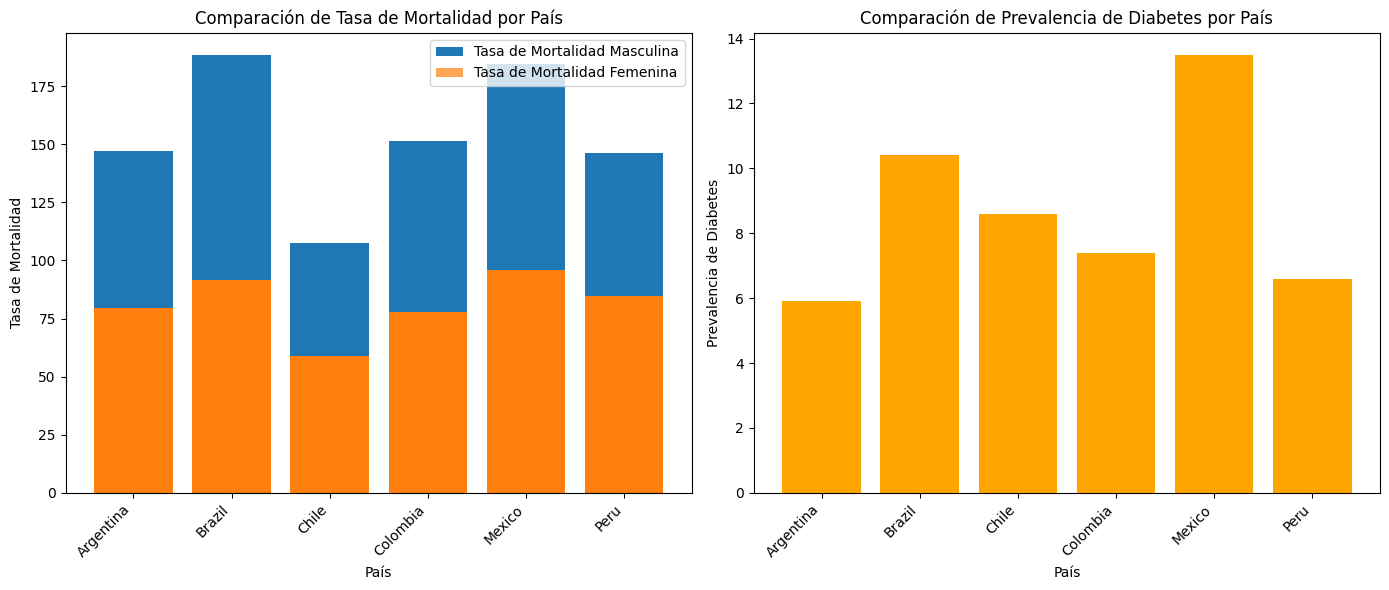

In [ ]:
# Crear la figura y las subtramas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para la tasa de mortalidad
axs[0].bar(data_latinoamerica_paises['country_name'], data_latinoamerica_paises['adult_male_mortality_rate'], label='Tasa de Mortalidad Masculina')
axs[0].bar(data_latinoamerica_paises['country_name'], data_latinoamerica_paises['adult_female_mortality_rate'], label='Tasa de Mortalidad Femenina', alpha=0.7)
axs[0].set_title('Comparación de Tasa de Mortalidad por País')
axs[0].set_xlabel('País')
axs[0].set_ylabel('Tasa de Mortalidad')
axs[0].legend()

# Gráfico de barras para la prevalencia de diabetes
axs[1].bar(data_latinoamerica_paises['country_name'], data_latinoamerica_paises['diabetes_prevalence'], color='orange')
axs[1].set_title('Comparación de Prevalencia de Diabetes por País')
axs[1].set_xlabel('País')
axs[1].set_ylabel('Prevalencia de Diabetes')

# Rotar las etiquetas del eje x para mejor visualización
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()


En este grafico de barras se interpreta que la mortalidad femenina es levente mas alta que la masculina. Brazil muestra un grafico un poco mas equitativo en cuanto a la mortalidad de cada uno de los sexos, por otro lado Mexico muestra una mayor incidencia en diabetes, las personas con diabetes han sido identificadas como un grupo de riesgo prioritario para la vacunación, por ende se entiende que la mortalidad femenina esta estrechamente relacionado a que las mujeres tienen mayor prepoderancia a la diabetes que los hombres.

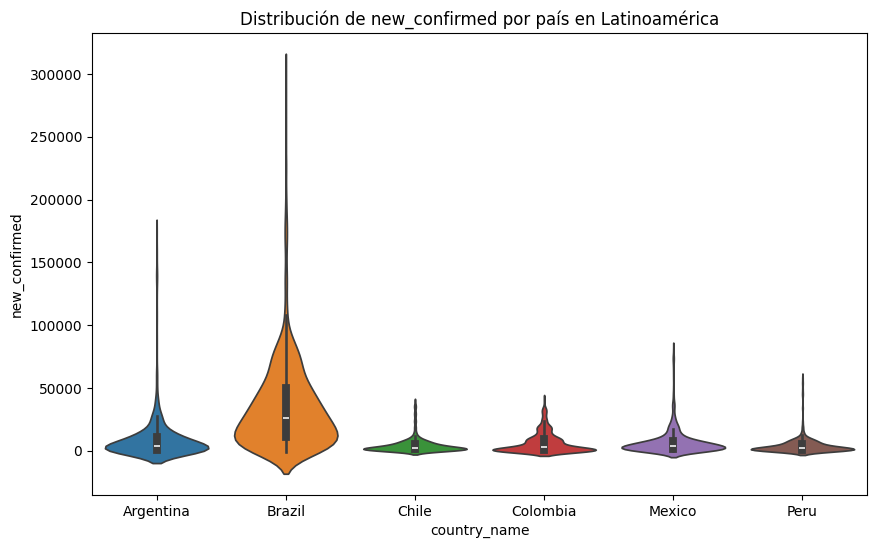

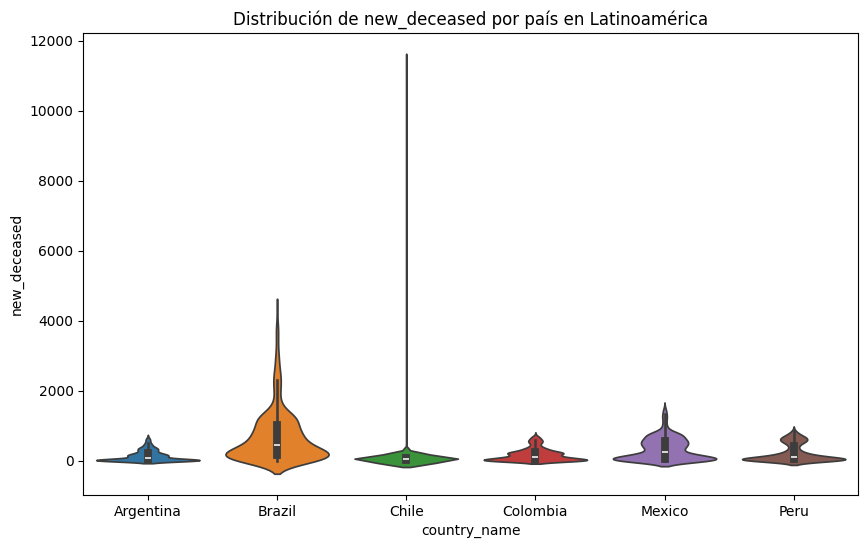

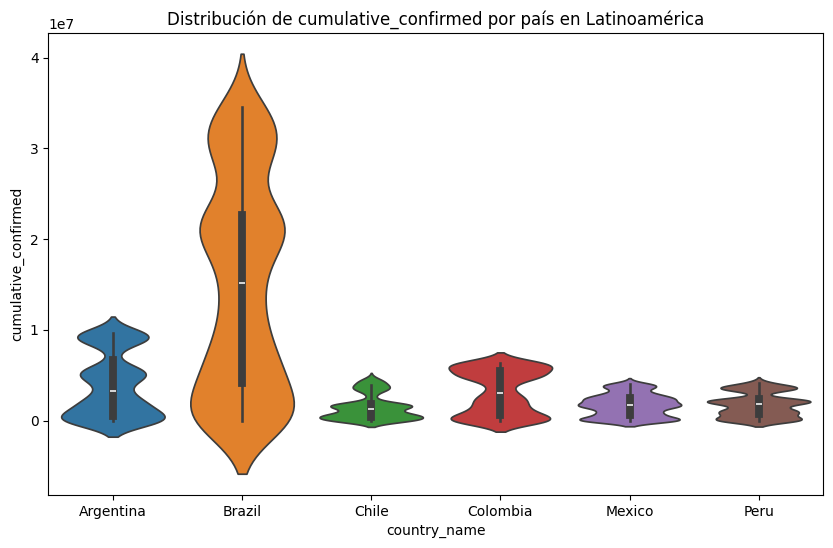

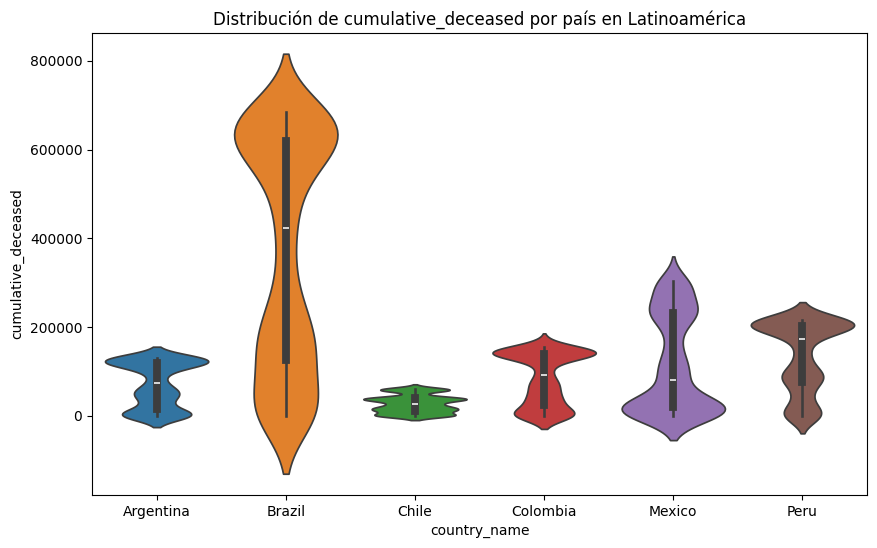

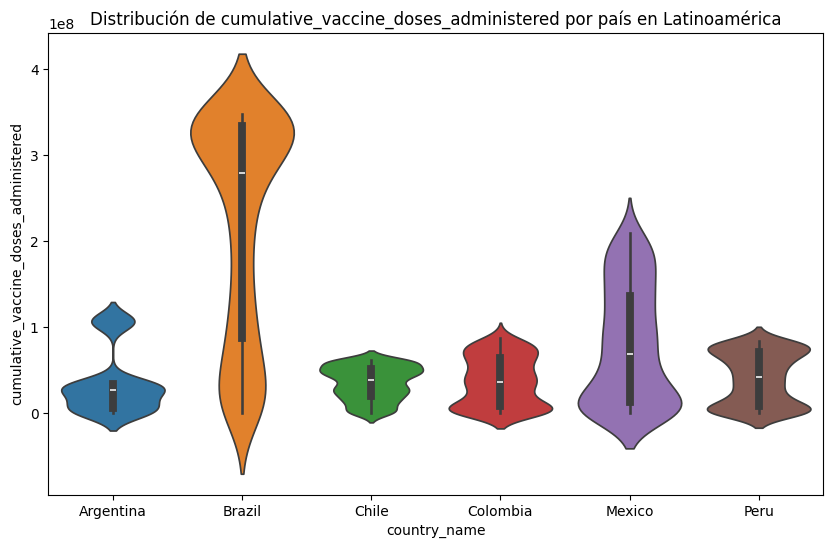

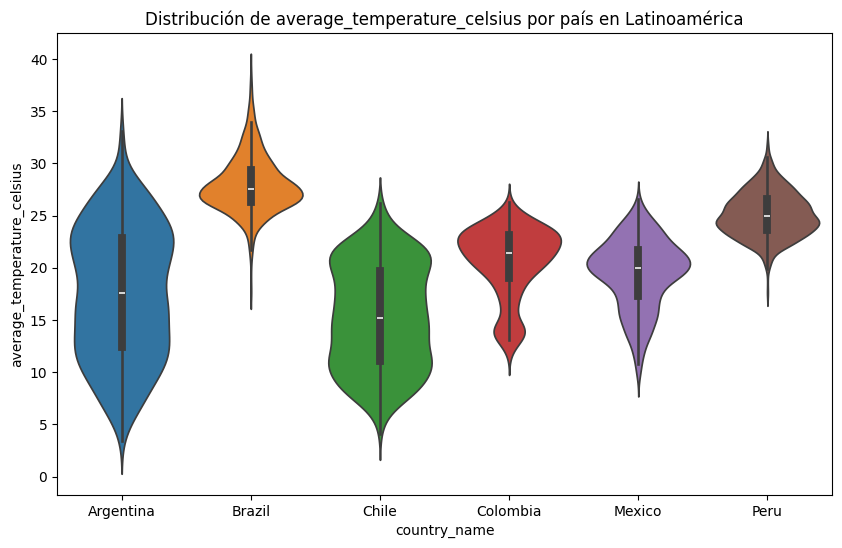

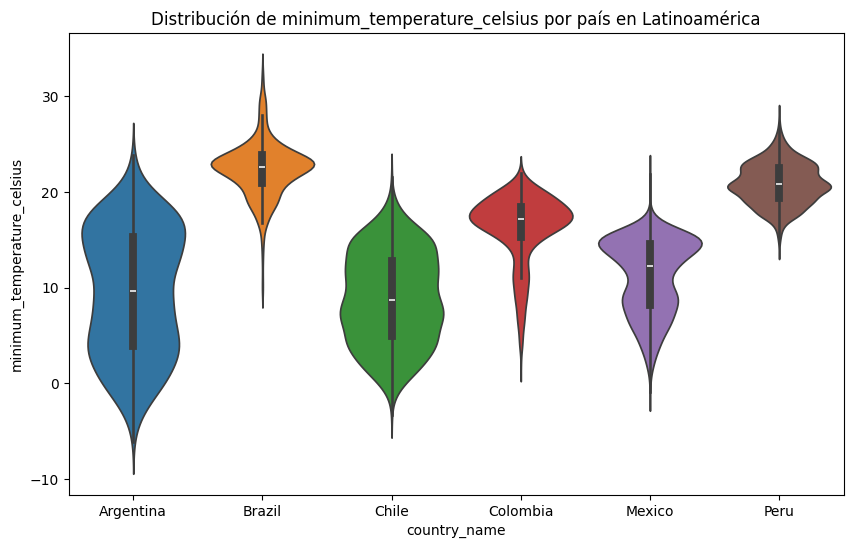

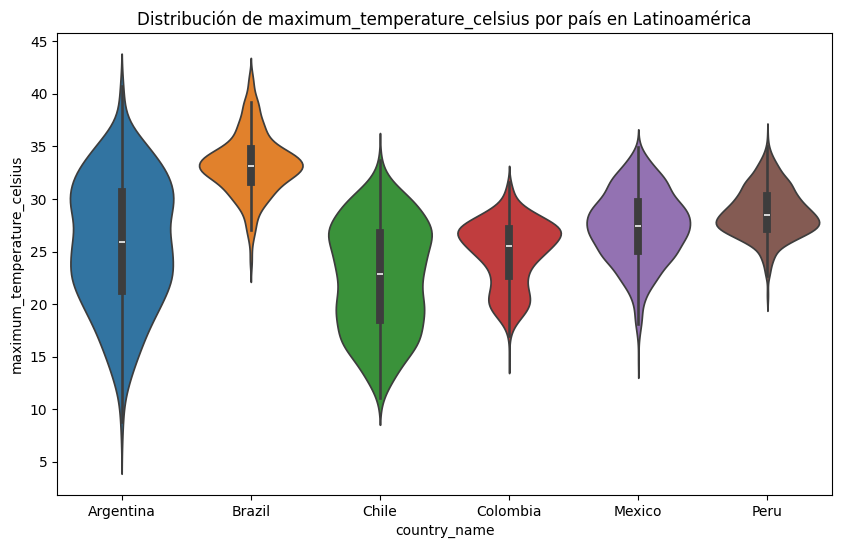

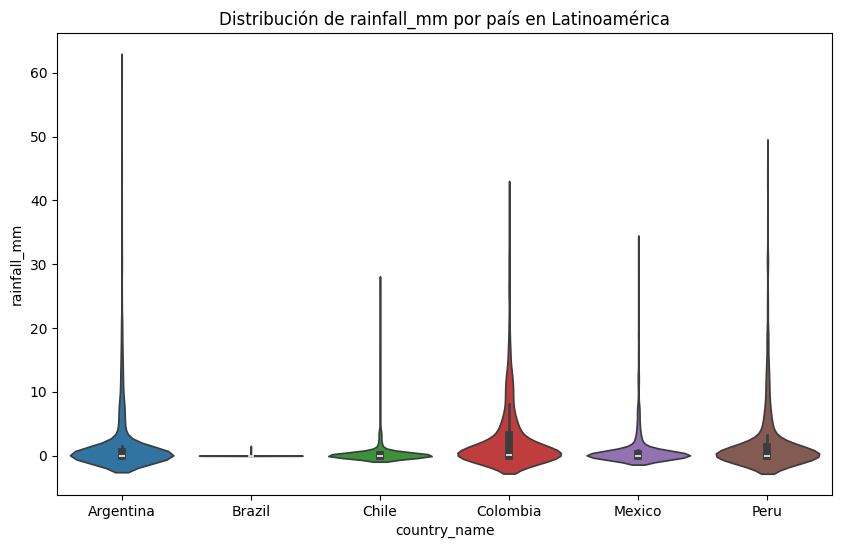

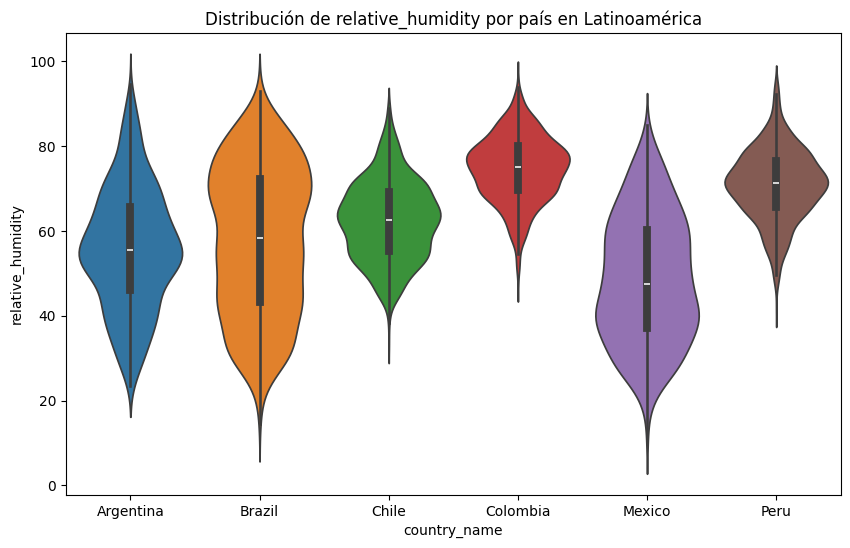

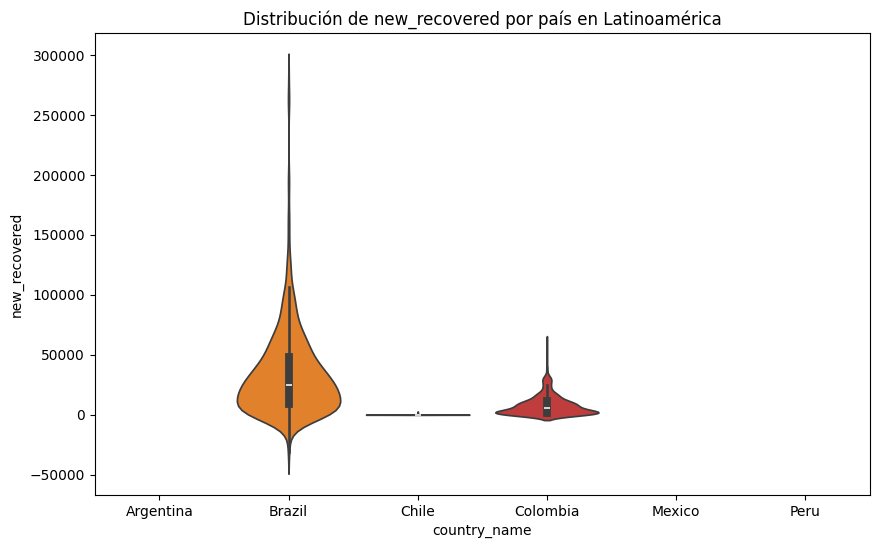

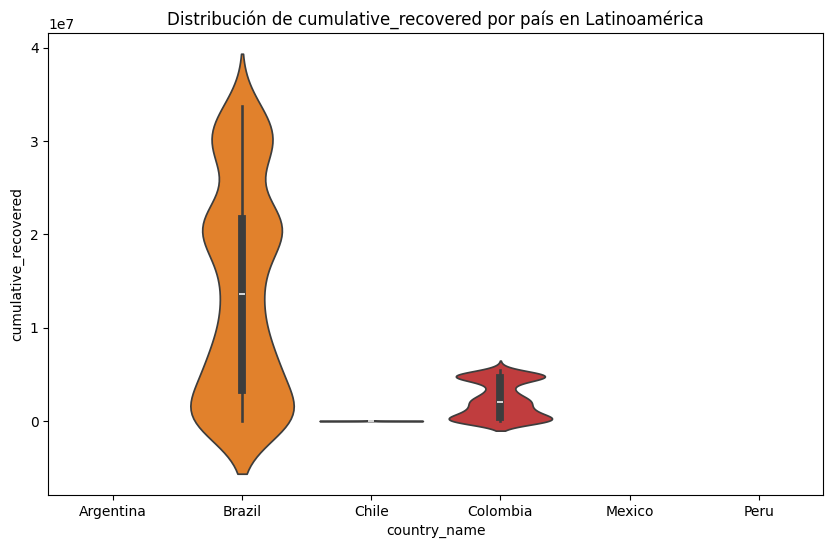

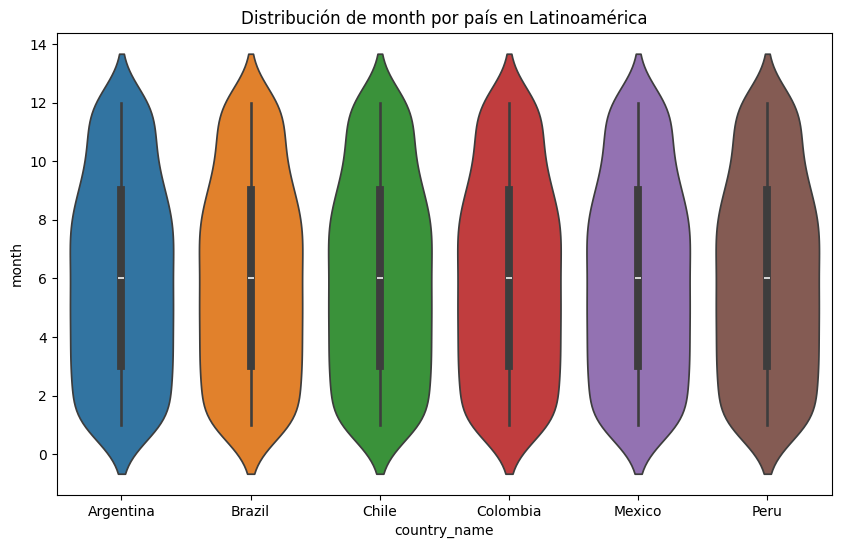

In [ ]:
# Crear una lista para almacenar las columnas que tienen más de 6 valores únicos
columnas_mayores_6 = []
for col in data_latinoamerica_paises.columns:
    if col != 'country_name' and data_latinoamerica_paises[col].nunique() > 6:
        columnas_mayores_6.append(col)

# Agregar 'country_name' a columnas_mayores_6 para poder hacer análisis por país
columnas_mayores_6.append("country_name")

# Crear un DataFrame con las columnas mayores a 6
data_latinoamerica_paises_mayores_6 = data_latinoamerica_paises[columnas_mayores_6]

# Violinplot en todos los países para variables numéricas
for col in data_latinoamerica_paises_mayores_6.columns:
    if col not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=col, data=data_latinoamerica_paises_mayores_6, hue='country_name')
        plt.title(f'Distribución de {col} por país en Latinoamérica')
        plt.show()


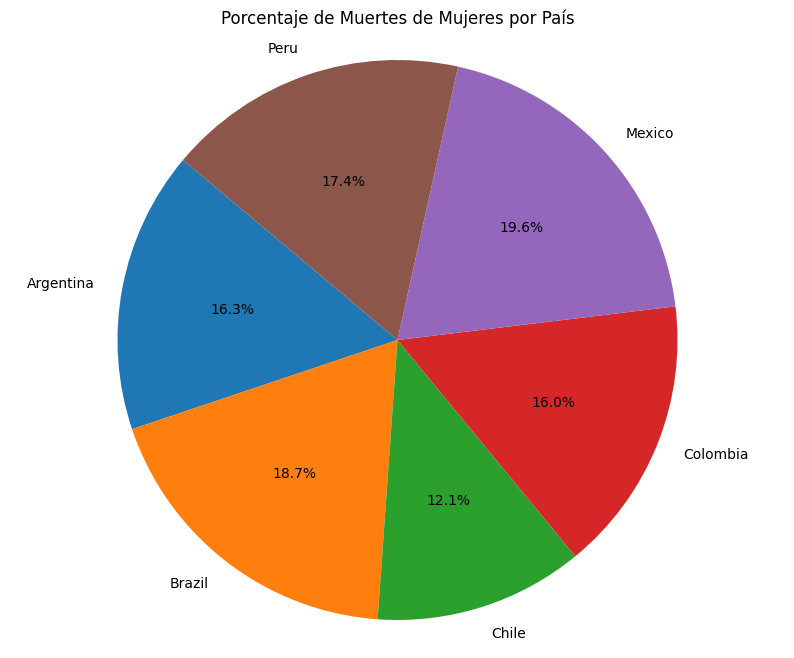

In [ ]:
# Agrupar los datos por país y calcular la media de muertes de mujeres
data_grouped = data_latinoamerica_paises_fecha.groupby('country_name')['adult_female_mortality_rate'].mean()

# Crear un gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(data_grouped, labels=data_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Muertes de Mujeres por País')
plt.axis('equal')  
plt.show()

El gráfico circular nos permite comparar visualmente los porcentajes de mortalidad femenina en cada país. Podemos observar que México tiene el porcentaje más alto con un 19.6%, seguido por Brasil con un 18.7%, mientras que Chile presenta el porcentaje más bajo con un 12.1%. La variabilidad en los porcentajes puede indicar diferencias en la respuesta de cada país ante la pandemia. Factores como la infraestructura de salud, medidas de prevención, acceso a la atención médica y características demográficas pueden influir en estas diferencias.

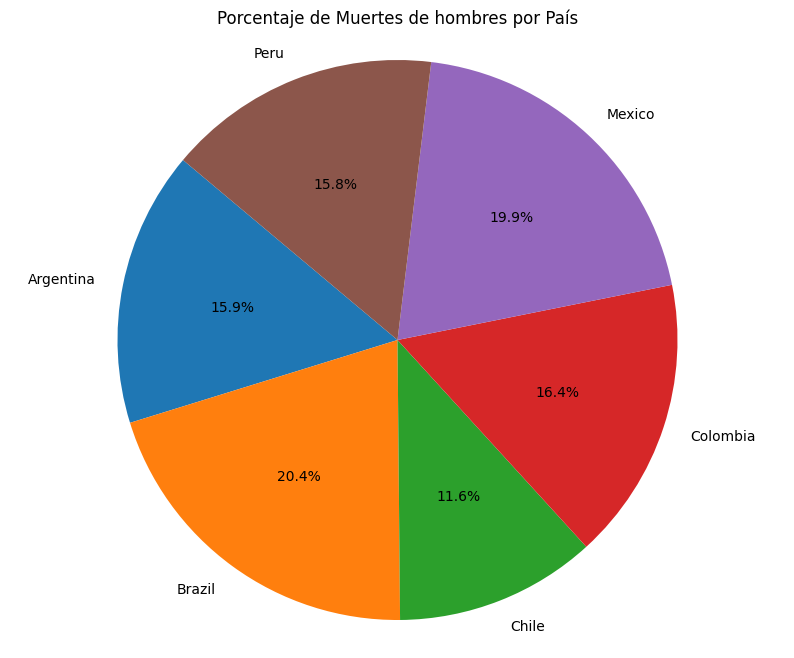

In [ ]:
# Agrupar los datos por país y calcular la media de muertes de hombres
data_grouped = data_latinoamerica_paises_fecha.groupby('country_name')['adult_male_mortality_rate'].mean()

# Crear un gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(data_grouped, labels=data_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Muertes de hombres por País')
plt.axis('equal')  
plt.show()

El gráfico circular permite comparar fácilmente los porcentajes de mortalidad masculina entre los países mencionados. En este caso, se observa que Brasil tiene el porcentaje más alto con un 20.4%, seguido por México con un 19.9%. Chile presenta el porcentaje más bajo con un 11.6%.Estos datos son relevantes para la toma de decisiones en salud pública. Pueden ayudar a identificar áreas donde se necesitan intervenciones específicas para reducir la mortalidad masculina, como fortalecer la atención médica, promover la prevención y garantizar el acceso equitativo a vacunas y tratamientos.

## Avance 3


In [ ]:
df=pd.read_csv('DatosFinalesFiltrado.csv')

In [ ]:
# 1. Análisis exploratorio básico
#visualizacion 
df 

location_key                 date country_code country_name  \
0              AR  2021-01-02 00:00:00           AR    Argentina   
1              AR  2021-01-03 00:00:00           AR    Argentina   
2              AR  2021-01-04 00:00:00           AR    Argentina   
3              AR  2021-01-05 00:00:00           AR    Argentina   
4              AR  2021-01-06 00:00:00           AR    Argentina   
...           ...                  ...          ...          ...   
3739           PE  2022-09-13 00:00:00           PE         Peru   
3740           PE  2022-09-14 00:00:00           PE         Peru   
3741           PE  2022-09-15 00:00:00           PE         Peru   
3742           PE  2022-09-16 00:00:00           PE         Peru   
3743           PE  2022-09-17 00:00:00           PE         Peru   

      new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0       7767.000000    166.000000          1.670634e+06         46688.000000   
1       4934.000000    157.000000          1.675568e+06         46845.000000   
2      13953.000000    157.000000          1.689521e+06         47002.000000   
3      14085.000000    160.000000          1.703606e+06         47162.000000   
4      14496.000000    131.000000          1.718102e+06         47293.000000   
...             ...           ...                   ...                  ...   
3739    1150.000000     22.000000          4.127612e+06        216173.000000   
3740    5032.183871    197.233871          2.576906e+06        188954.366129   
3741    5032.183871    197.233871          2.576906e+06        188954.366129   
3742    5032.183871    197.233871          2.576906e+06        188954.366129   
3743    5032.183871    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370              

In [ ]:
df['date'] = pd.to_datetime(df['date'])



In [ ]:

print(df.info())  # Información general del DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64 

In [ ]:
print(df.describe())  # Estadísticas descriptivas

                      date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3744.000000   3744.000000          3.744000e+03   
mean   2021-11-09 12:00:00   13921.908931    276.887411          6.777074e+06   
min    2021-01-02 00:00:00    -573.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1536.750000     26.000000          2.132216e+06   
50%    2021-11-09 12:00:00    5214.000000    100.500000          3.632144e+06   
75%    2022-04-14 06:00:00   14834.000000    312.000000          6.223497e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24219.361378    507.240028          7.989269e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3744.000000                           3.744000e+03   
mean         192957.902075                           6.544474e+07   
min               1.000000                           0.000000e+

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/1378055095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/1378055095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['week'] = data_latinoamerica_paises['date'].dt.isocalendar().week


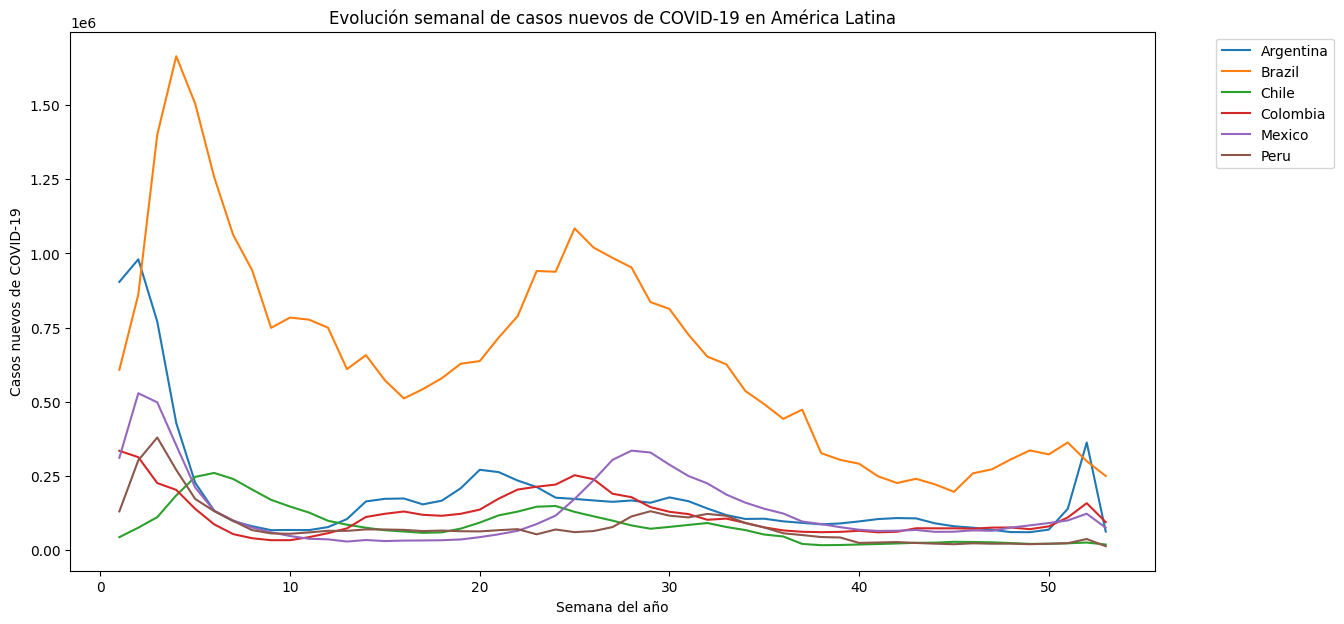

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/1378055095.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month


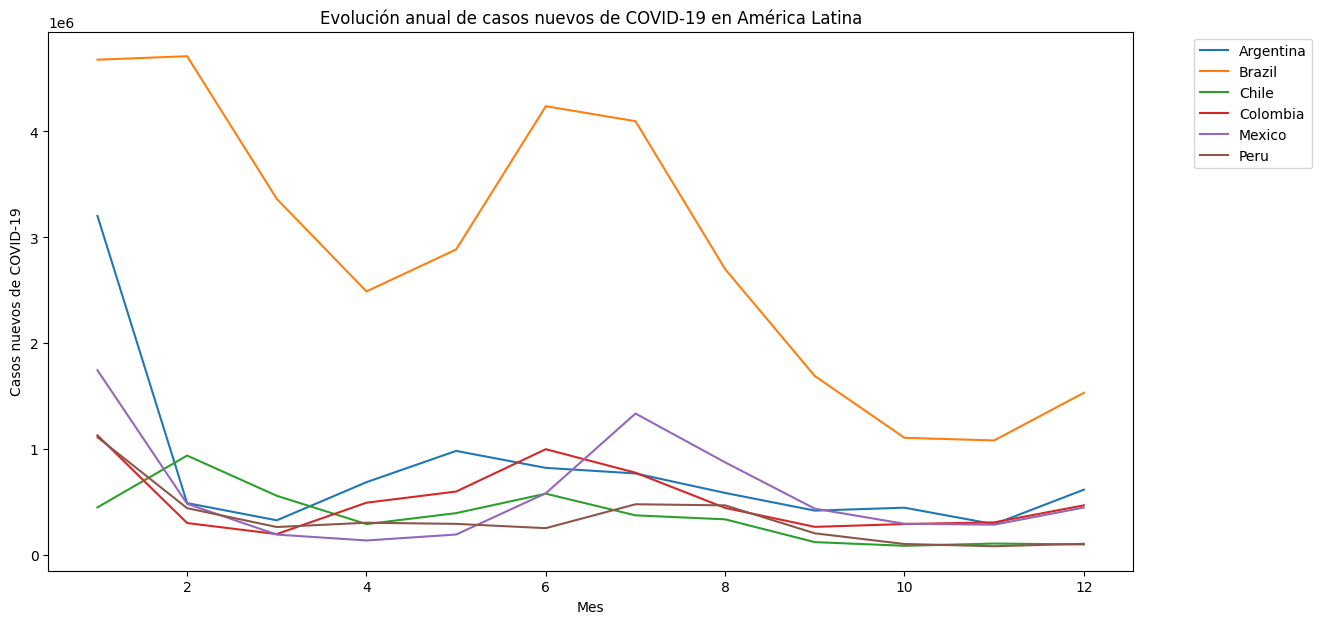

In [ ]:
#Evolucion casos de Covid-19 en America Latina a lo largo del tiempo por semana
# Convertir la columna 'date' a tipo datetime si no está en ese formato
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Calcular la semana del año y agregarla como una columna nueva
data_latinoamerica_paises['week'] = data_latinoamerica_paises['date'].dt.isocalendar().week

# Calcular casos semanales
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

# Graficar evolución semanal de casos nuevos de Covid-19 en América Latina
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)
plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución semanal de casos nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calcular casos mensuales
data_latinoamerica_paises['month'] = data_latinoamerica_paises['date'].dt.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Graficar evolución anual de casos nuevos de Covid-19 en América Latina
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)
plt.xlabel('Mes')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución anual de casos nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En estos graficos de puede observar un gran pico de casos en las primeras semanas del 2021, con una baja de nuesvos contagiados hasta un pico en el mes 6. Luego una baja paulatina. 

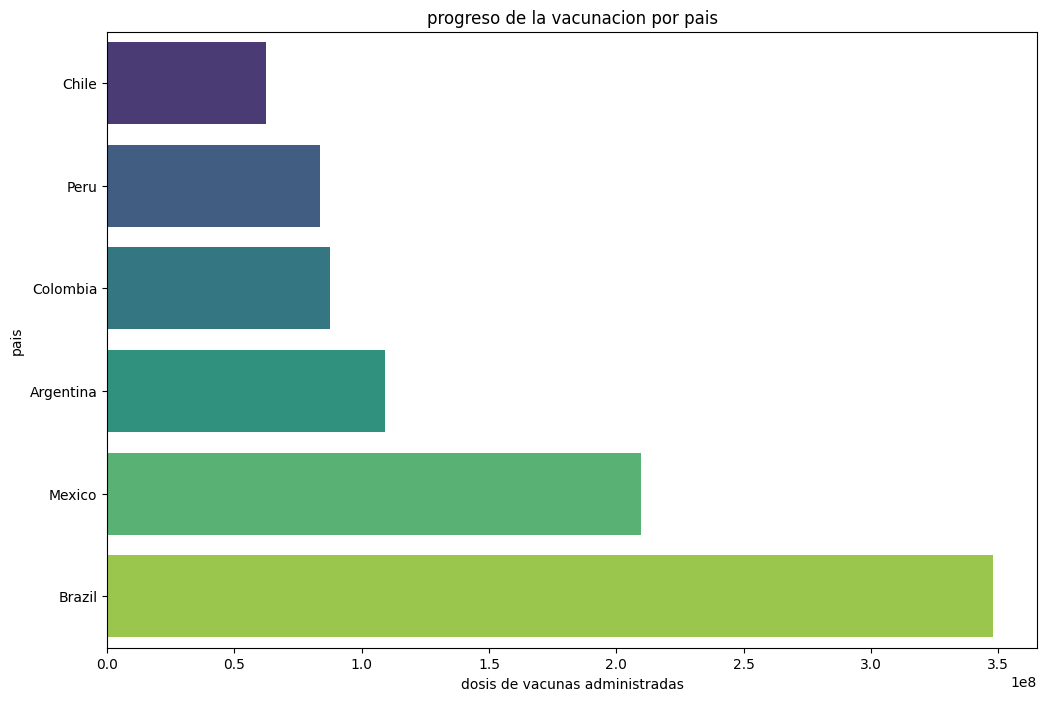

In [ ]:
#Progreso de la vacunacion por Pais
vaccination_data= data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values()

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index,palette='viridis')
plt.xlabel('dosis de vacunas administradas')
plt.ylabel('pais')
plt.title('progreso de la vacunacion por pais')
plt.show()

Progreso de vacunacion por pais 

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/3589044136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/3589044136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')


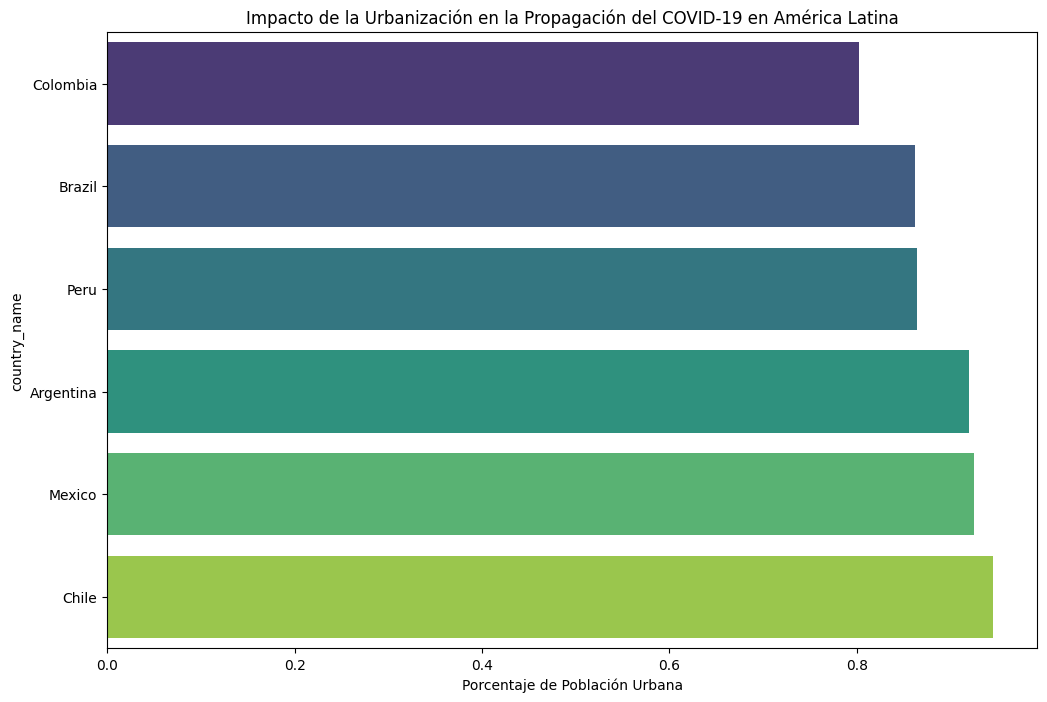

In [ ]:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()

A simple vista se puede observar que las zonas urbanas tienen mayores contagios. 

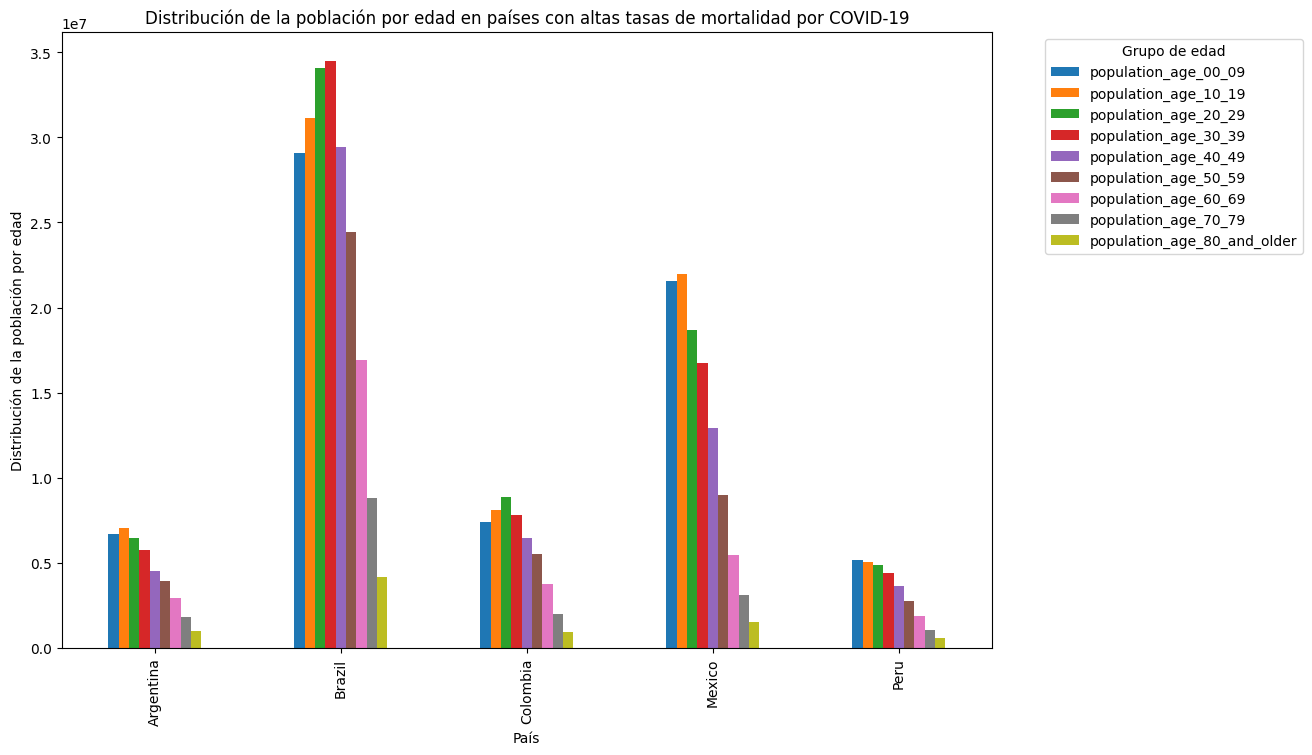

In [ ]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.title('Distribución de la población por edad en países con altas tasas de mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()

Mostrando la distribucion de la poblacion observamos que Brazil y Mexico tienen la mayor cantidad de poblacion.

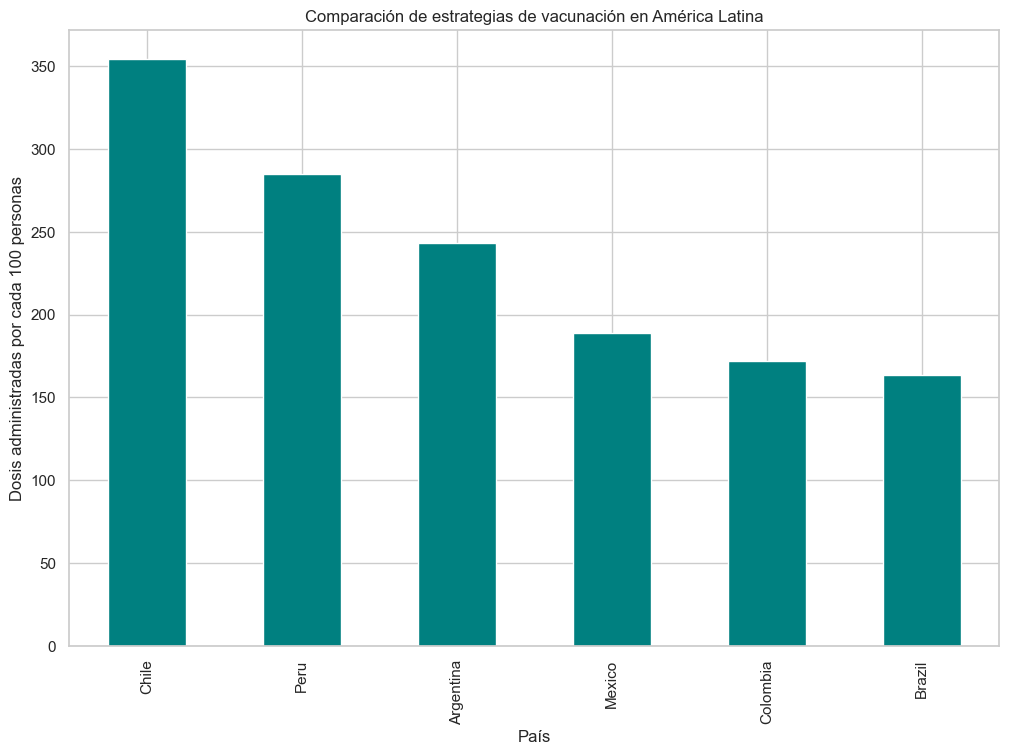

In [ ]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.title('Comparación de estrategias de vacunación en América Latina')
plt.show()

La campaña de vacunacion fue exitosa y mas efectiva por sus buenas politicas sanitarias en Chile, en el ultimo lugar tenemos a Brazil dejando en evidencia su mala politica frente a la salud. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


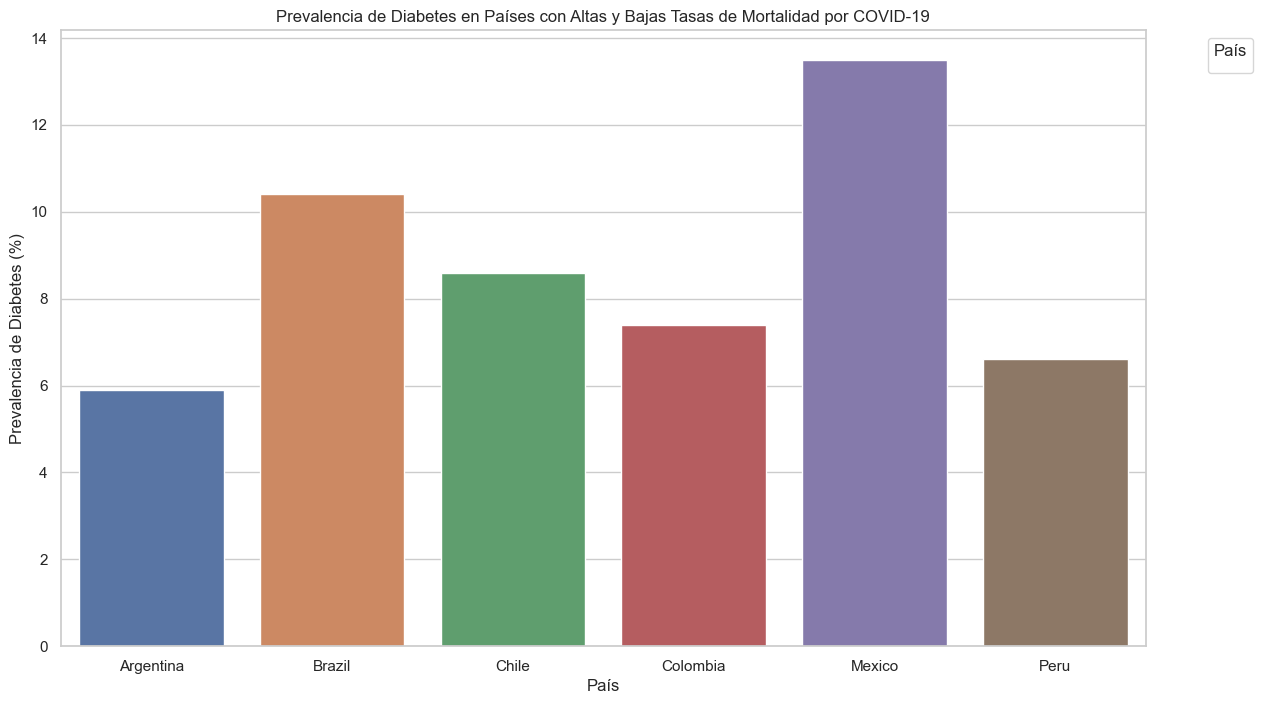

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


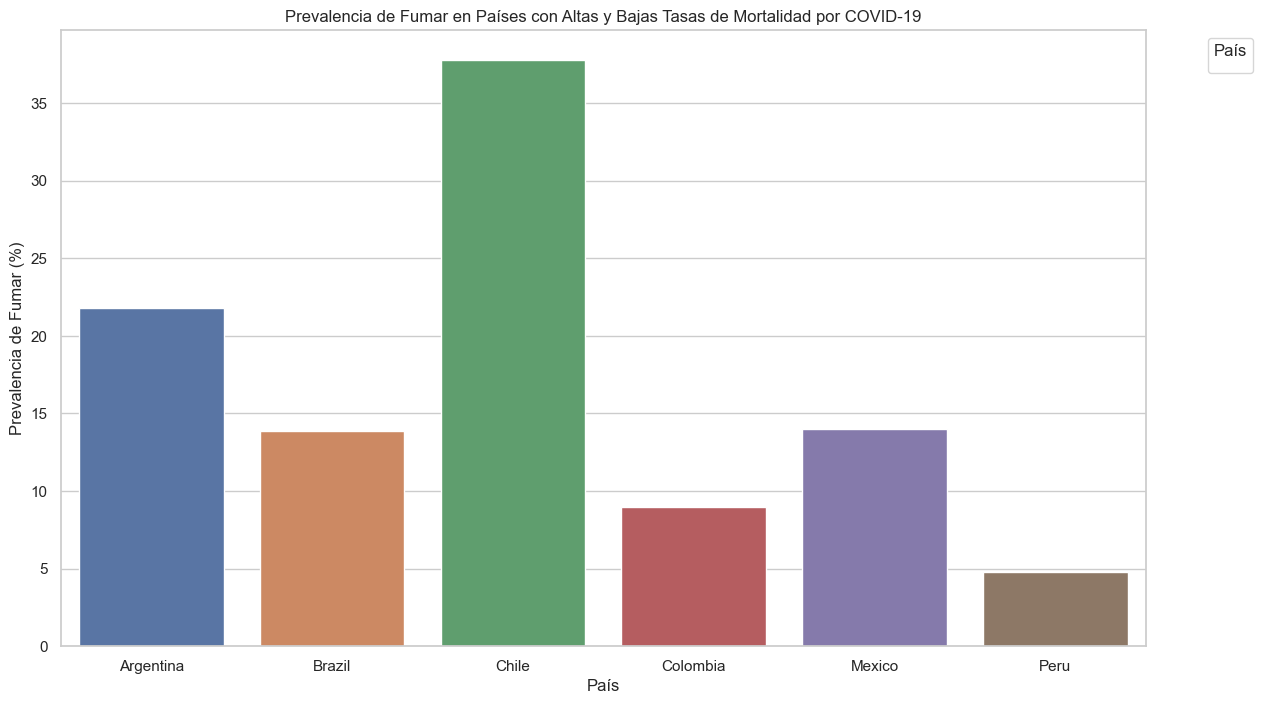

In [ ]:
# Obtener los 5 países con las tasas de mortalidad más altas y más bajas
top_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

# Filtrar los datos para los países seleccionados
conditions_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))]

# Gráfico de barras para la prevalencia de diabetes
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Diabetes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico de barras para la prevalencia de fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Chile tiene la mayor poblacion de fumadores y Mexico la mayor prevalencia de diabetes. 

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_53719/3900346528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']


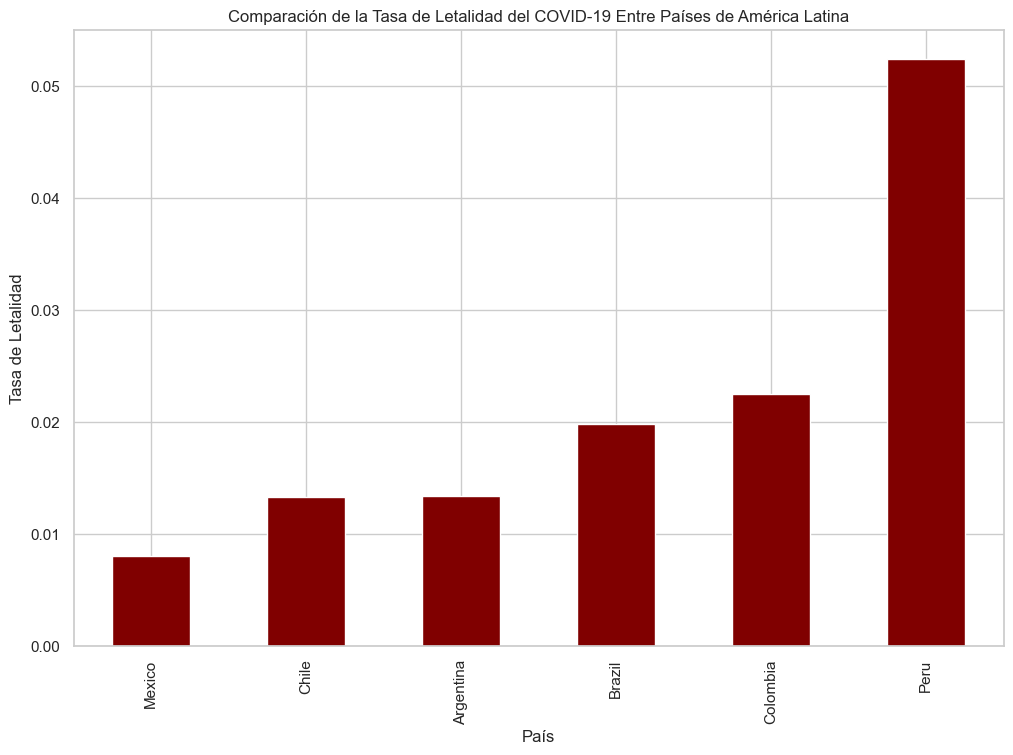

In [ ]:
#Fatalidad por pais
# Calcular la tasa de letalidad
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

# Obtener la última tasa de letalidad por país
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Graficar la tasa de letalidad por país
plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Peru nos demuestra en este grafico su mala politica sanitaria denotando su alta tasa de letalidad. 

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_53719/2955102676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_53719/2955102676.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


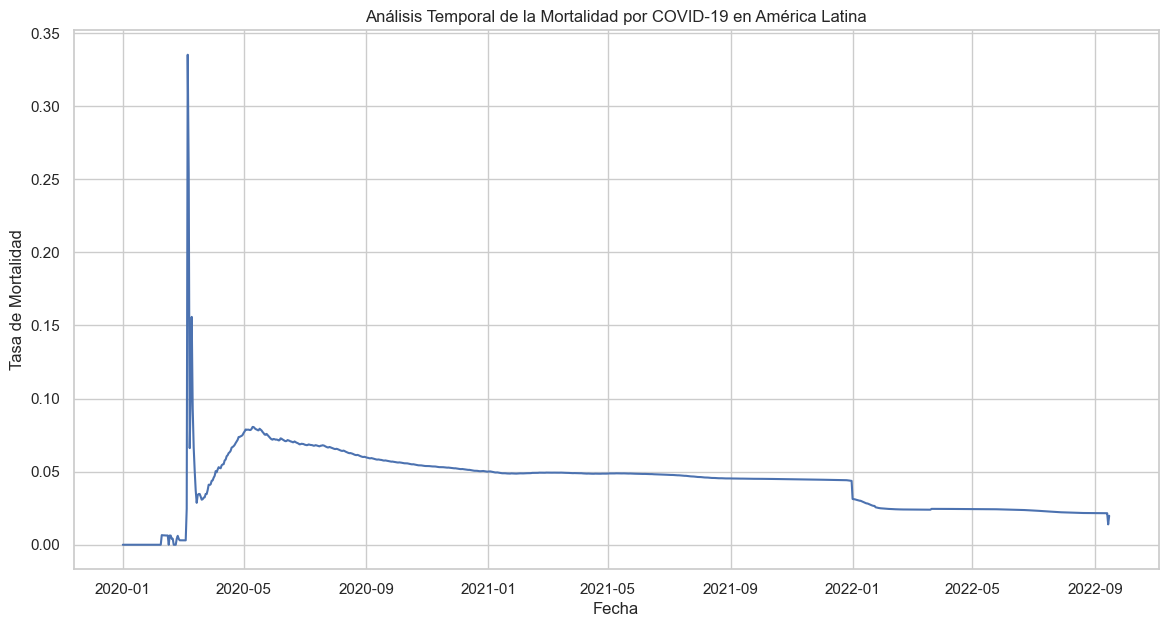

In [ ]:
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()


/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_53719/449585048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_recovered'] - data_latinoamerica_paises['cumulative_deceased']


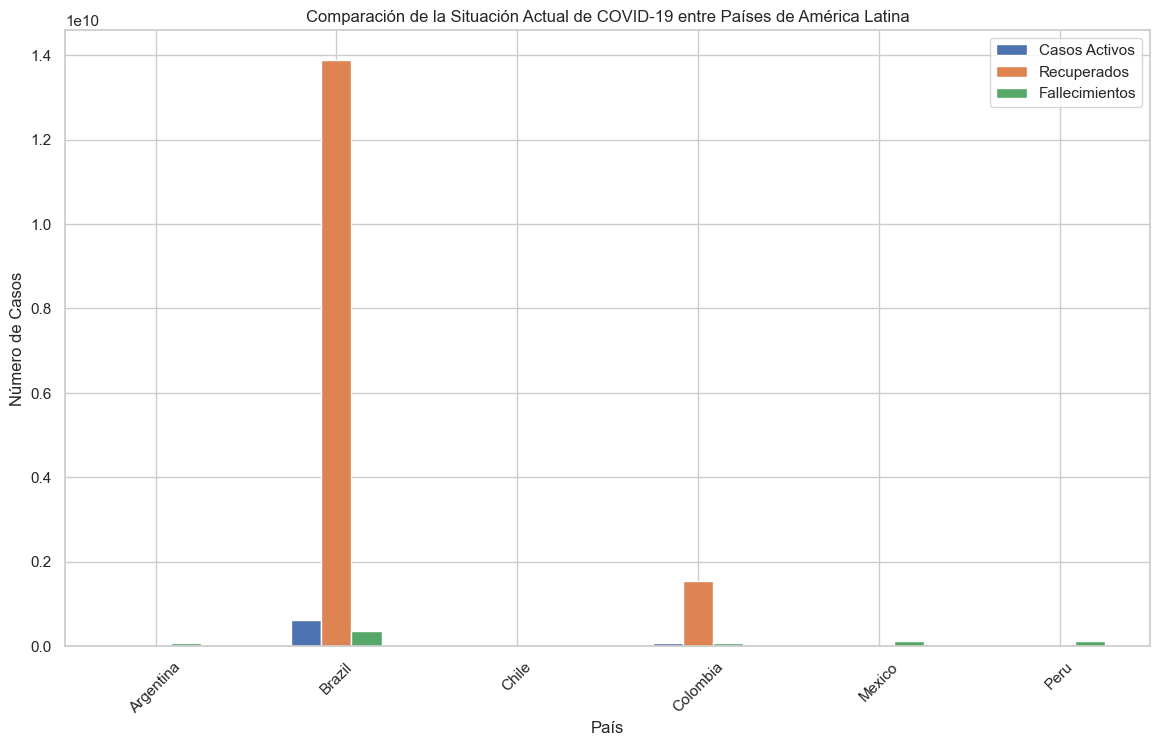

In [ ]:
# Calcular casos activos
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_recovered'] - data_latinoamerica_paises['cumulative_deceased']

# Agrupar por país y calcular la suma de casos activos, recuperados y fallecidos
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].sum()

# Graficar la situación actual de COVID-19
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Fallecimientos'])
plt.xticks(rotation=45)
plt.show()


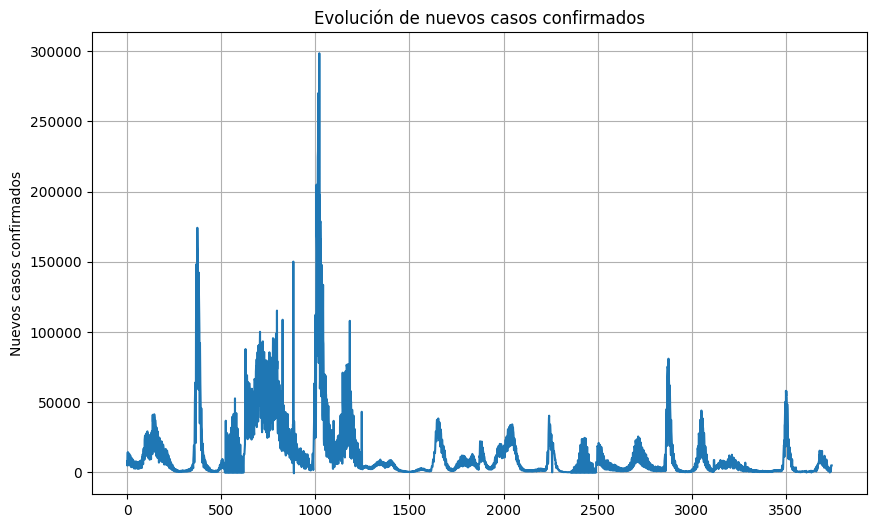

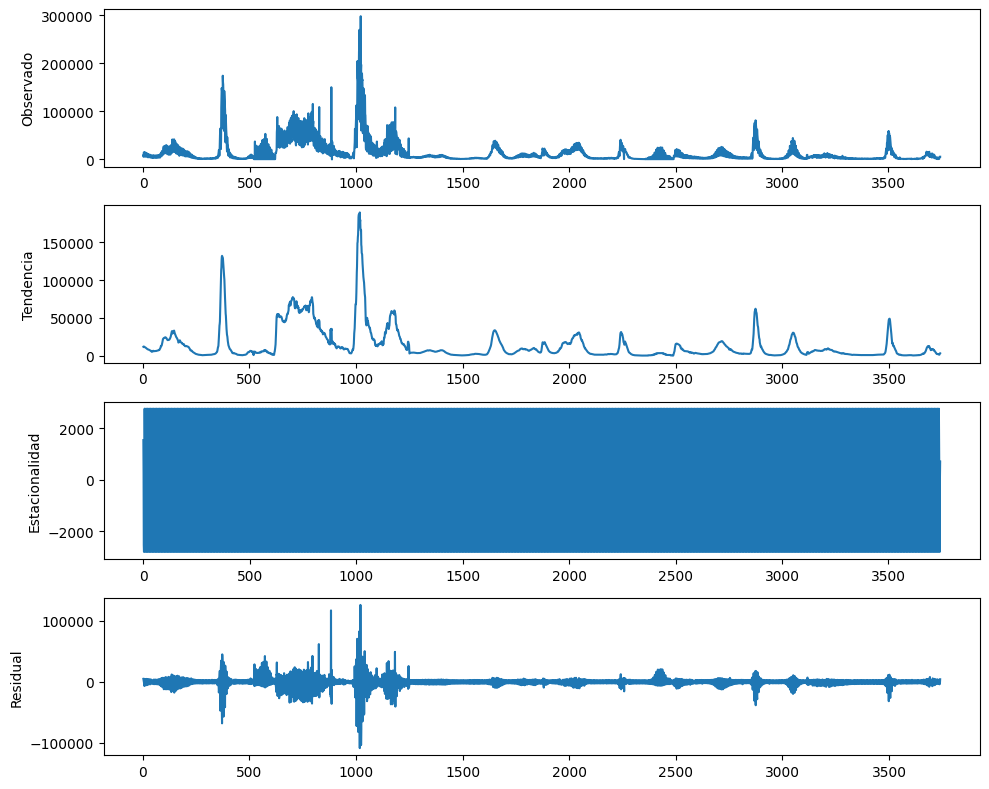

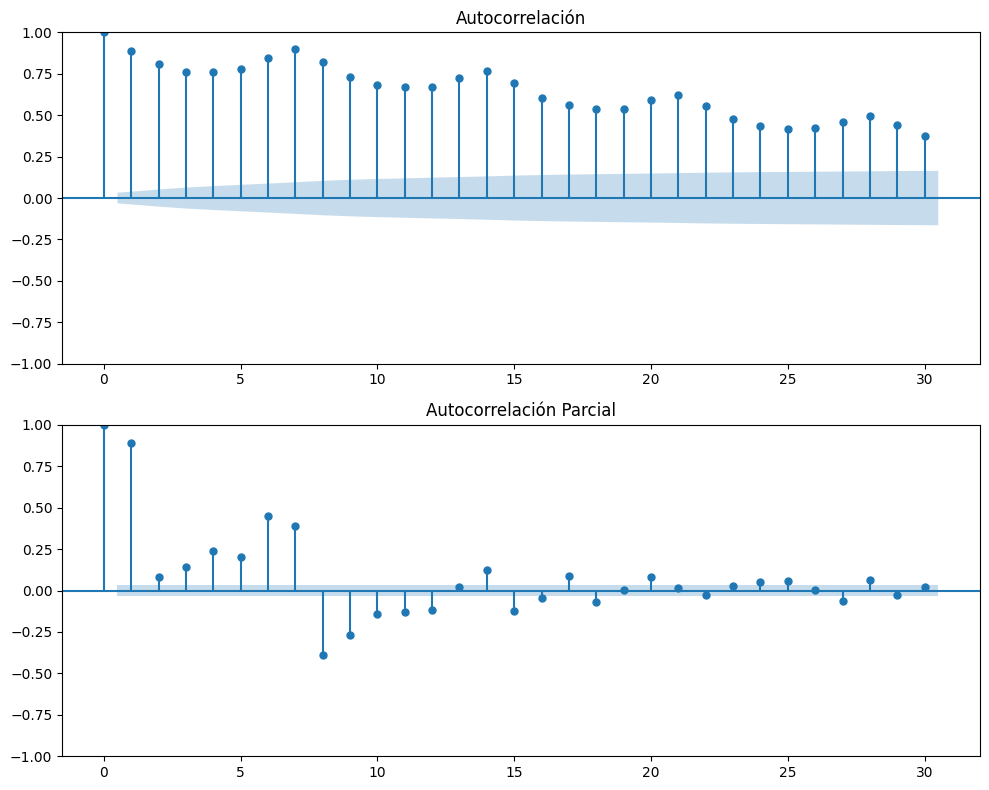

In [ ]:
# Gráfico de la serie temporal de 'new_confirmed'
plt.figure(figsize=(10, 6))
plt.plot(df['new_confirmed'])
plt.title('Evolución de nuevos casos confirmados')
#plt.xlabel('Date')
plt.ylabel('Nuevos casos confirmados')
plt.grid(True)
plt.show()

# Análisis de tendencia y estacionalidad usando descomposición
result = seasonal_decompose(df['new_confirmed'], model='additive', period=7)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

# Análisis de autocorrelación (ACF y PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['new_confirmed'], lags=30, ax=ax1)
ax1.set_title('Autocorrelación')

plot_pacf(df['new_confirmed'], lags=30, ax=ax2)
ax2.set_title('Autocorrelación Parcial')

plt.tight_layout()
plt.show()

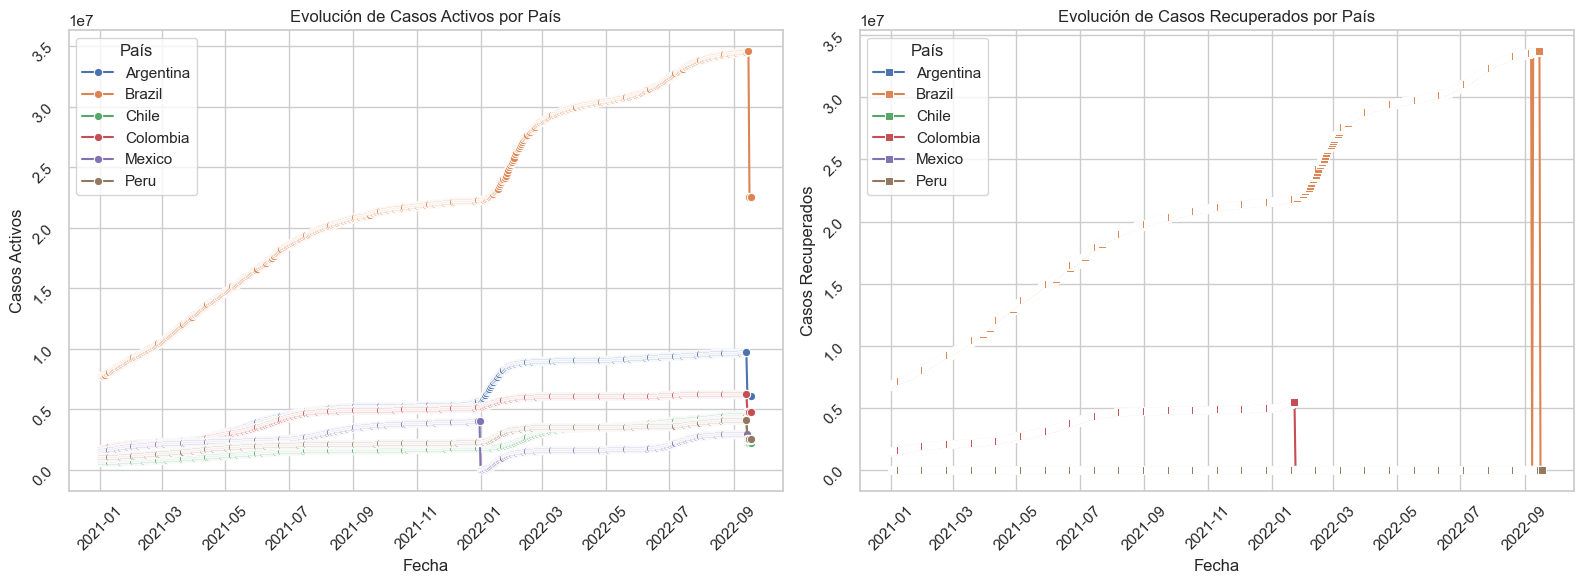

In [ ]:
#Relación entre la Cobertura de Vacunación y la Reducción de Casos
# Filtrar los datos para los países seleccionados
df_paises = df[df['country_name'].isin(paises_seleccionados)]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear subplots para casos activos y recuperados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico de casos activos
sns.lineplot(x='date', y='cumulative_confirmed', hue='country_name', data=df_paises, marker='o', ax=axes[0])
axes[0].set_title('Evolución de Casos Activos por País')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Casos Activos')
axes[0].tick_params(rotation=45)
axes[0].legend(title='País')

# Gráfico de recuperados
sns.lineplot(x='date', y='cumulative_recovered', hue='country_name', data=df_paises, marker='s', ax=axes[1])
axes[1].set_title('Evolución de Casos Recuperados por País')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Casos Recuperados')
axes[1].tick_params(rotation=45)
axes[1].legend(title='País')

plt.tight_layout()
plt.show()

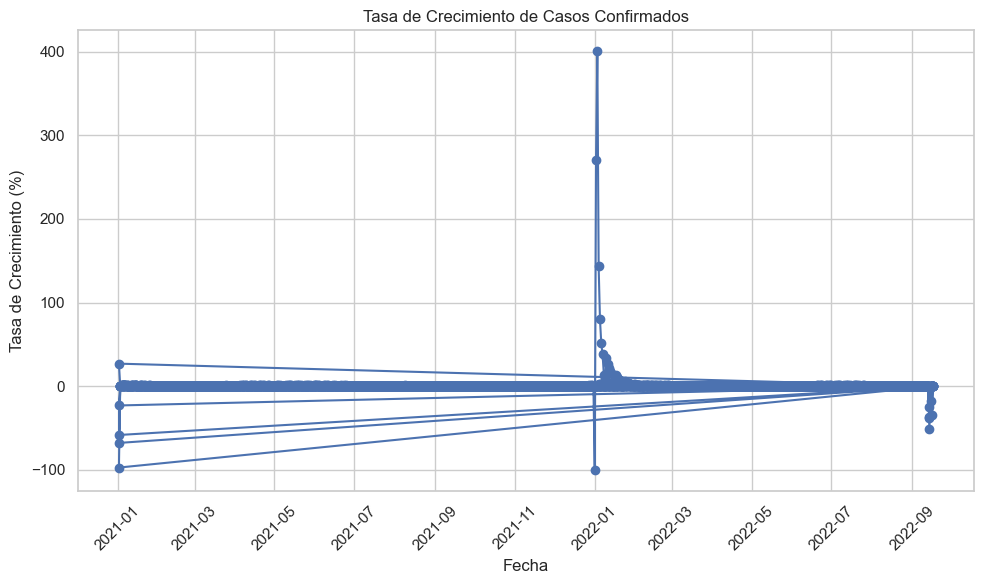

In [ ]:
# Calcula la tasa de crecimiento para la columna "cumulative_confirmed"
df['tasa_crecimiento_confirmed'] = df['cumulative_confirmed'].pct_change() * 100
# Graficar la tasa de crecimiento de casos confirmados acumulados
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['tasa_crecimiento_confirmed'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Crecimiento de Casos Confirmados')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


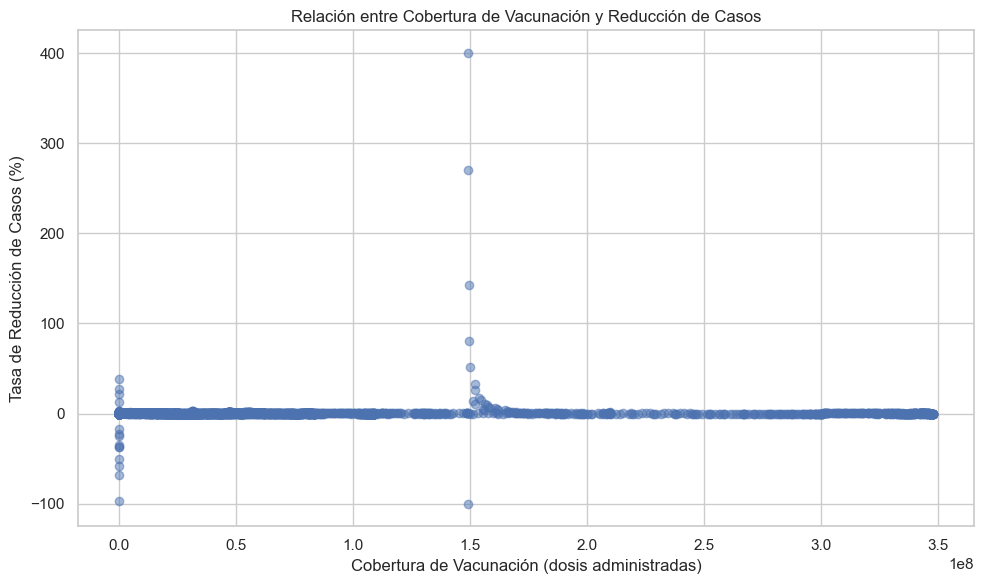

In [ ]:
# Calcula la tasa de reducción de casos como porcentaje de reducción respecto al día anterior
df['tasa_reduccion_casos'] = df['cumulative_confirmed'].diff() / df['cumulative_confirmed'].shift(1) * 100

# Graficar la relación entre la cobertura de vacunación y la tasa de reducción de casos
plt.figure(figsize=(10, 6))
plt.scatter(df['cumulative_vaccine_doses_administered'], df['tasa_reduccion_casos'], color='b', alpha=0.5)
plt.title('Relación entre Cobertura de Vacunación y Reducción de Casos')
plt.xlabel('Cobertura de Vacunación (dosis administradas)')
plt.ylabel('Tasa de Reducción de Casos (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

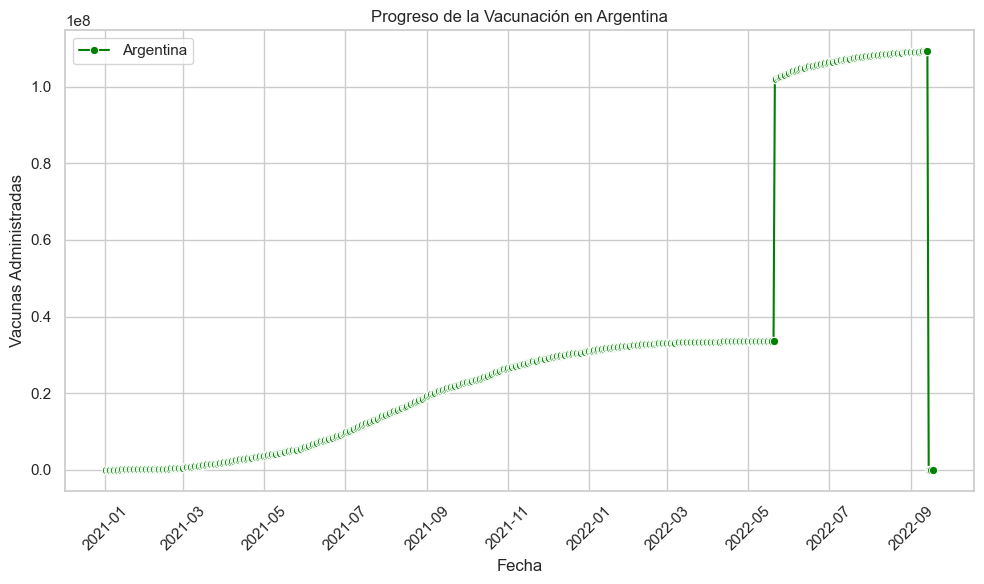

In [ ]:
# Filtrar los datos para un país específico
pais_seleccionado = 'Argentina'
df_pais = df[df['country_name'] == pais_seleccionado]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico utilizando Seaborn y configurar las líneas en color rosa
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', data=df_pais, marker='o', color='green', label=pais_seleccionado)

# Configurar título y etiquetas
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

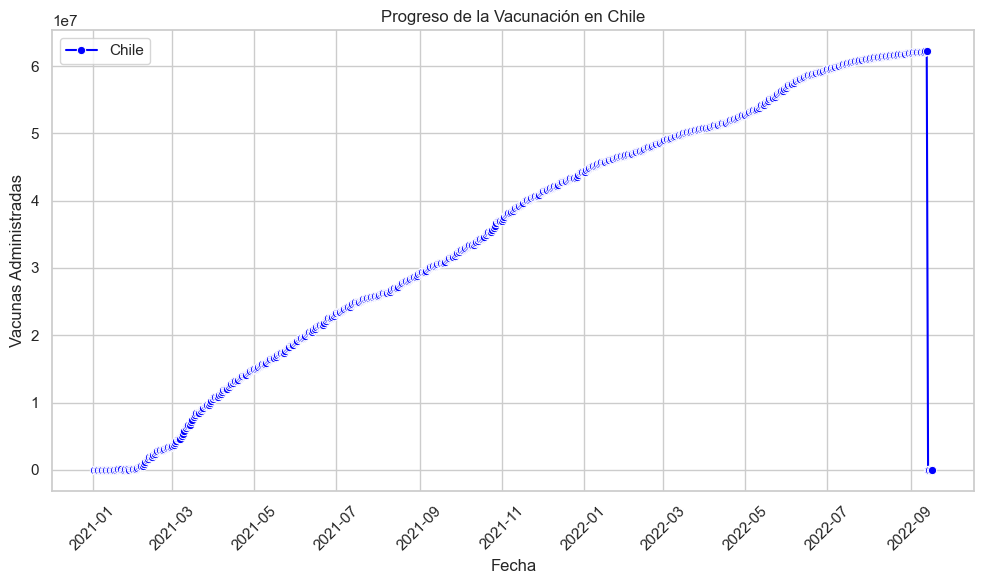

In [ ]:
# Filtramos los datos para un país específico
pais_seleccionado = 'Chile'
df_pais = df[df['country_name'] == pais_seleccionado]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', data=df_pais, marker='o', color='blue', label=pais_seleccionado)

# Configurar título y etiquetas
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

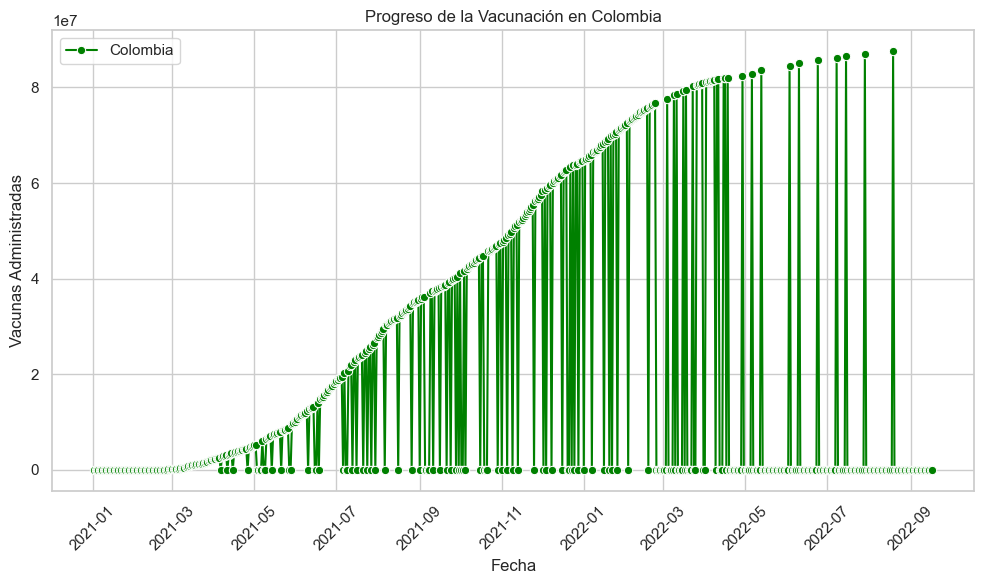

In [ ]:
# Filtramos los datos para un país específico
pais_seleccionado = 'Colombia'
df_pais = df[df['country_name'] == pais_seleccionado]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico utilizando Seaborn con líneas amarillas
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', data=df_pais, marker='o', color='green', label=pais_seleccionado)

# Configurar título y etiquetas
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

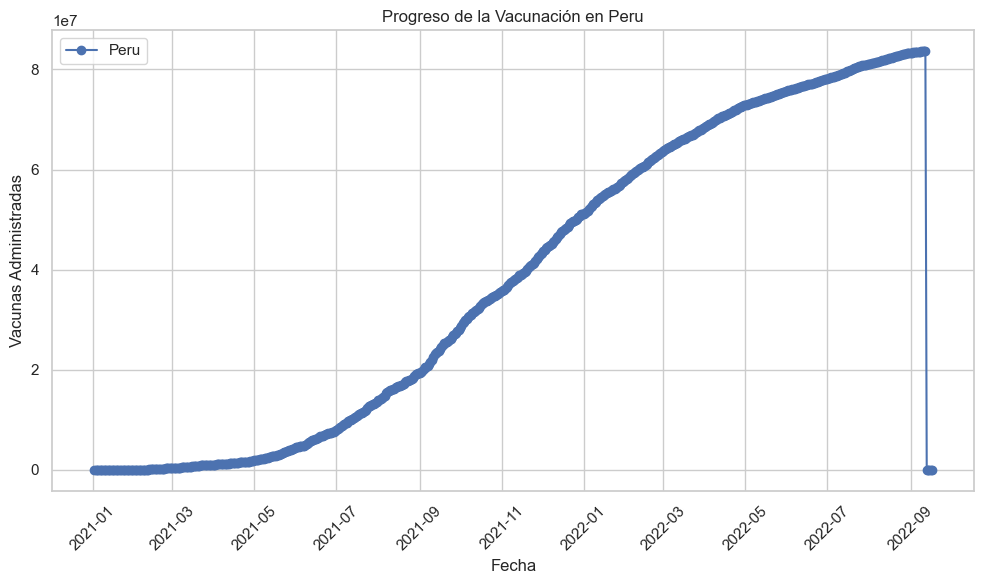

In [ ]:
# Filtramos los datos para un país específico, por ejemplo, 'Argentina'
pais_seleccionado = 'Peru'
df_pais = df[df['country_name'] == pais_seleccionado]

# Graficar el progreso de la vacunación por país
plt.figure(figsize=(10, 6))
plt.plot(df_pais['date'], df_pais['cumulative_vaccine_doses_administered'], marker='o', color='b', label=pais_seleccionado)
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

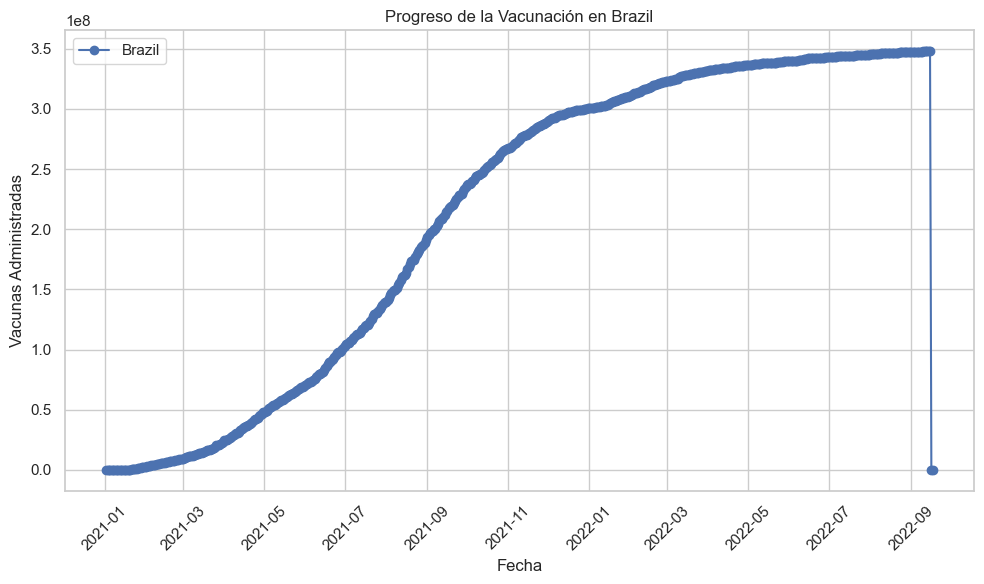

In [ ]:
# Filtramos los datos para un país específico, por ejemplo, 'Argentina'
pais_seleccionado = 'Brazil'
df_pais = df[df['country_name'] == pais_seleccionado]

# Graficar el progreso de la vacunación por país
plt.figure(figsize=(10, 6))
plt.plot(df_pais['date'], df_pais['cumulative_vaccine_doses_administered'], marker='o', color='b', label=pais_seleccionado)
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

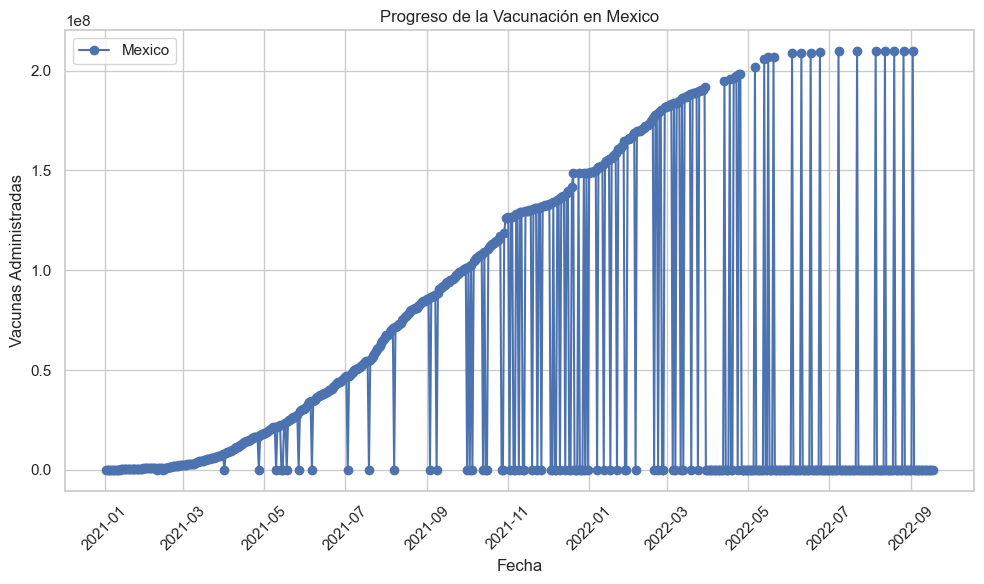

In [ ]:
# Filtramos los datos para un país específico, por ejemplo, 'Argentina'
pais_seleccionado = 'Mexico'
df_pais = df[df['country_name'] == pais_seleccionado]

# Graficar el progreso de la vacunación por país
plt.figure(figsize=(10, 6))
plt.plot(df_pais['date'], df_pais['cumulative_vaccine_doses_administered'], marker='o', color='b', label=pais_seleccionado)
plt.title('Progreso de la Vacunación en {}'.format(pais_seleccionado))
plt.xlabel('Fecha')
plt.ylabel('Vacunas Administradas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El progreso de vacunacion fue progresivo en todos los paises excluyendo a Argentina que crecio exponencialmente en mayo del 2022, eso se puede deber a la nueva adquisicion de mas vacunas. 

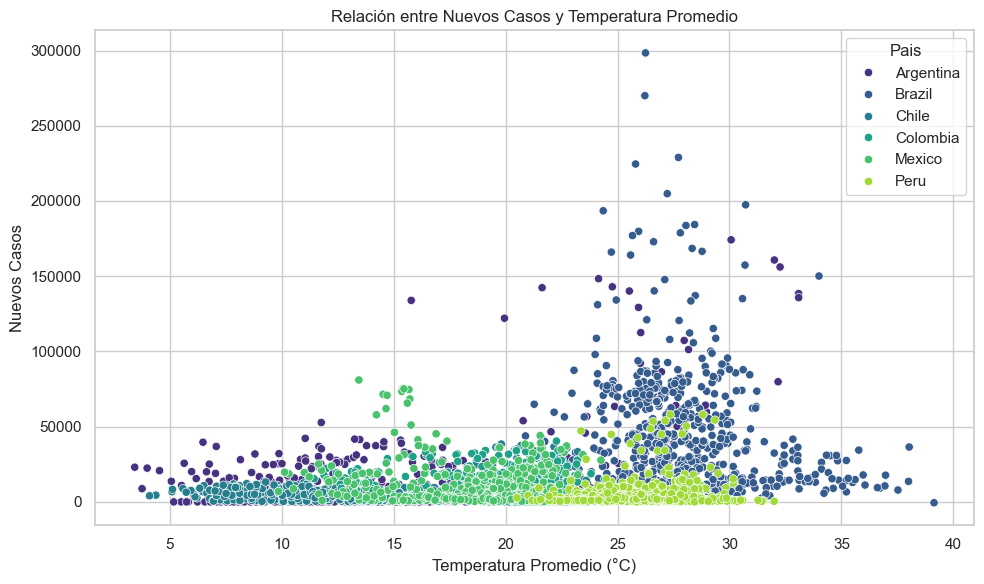

In [ ]:
#Nuevos casos y temperatura promedio

# Extraer el año de cada fecha y crear una nueva columna
df['year'] = df['date'].dt.year

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df, hue='country_name', palette='viridis', legend='full')
plt.title('Relación entre Nuevos Casos y Temperatura Promedio')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Nuevos Casos')
plt.legend(title='Pais')
plt.grid(True)
plt.tight_layout()
plt.show()

La temperatura no influyo en el contagio de nuesvos casos, ya que, en todas las temperaturas se presentran contagios.

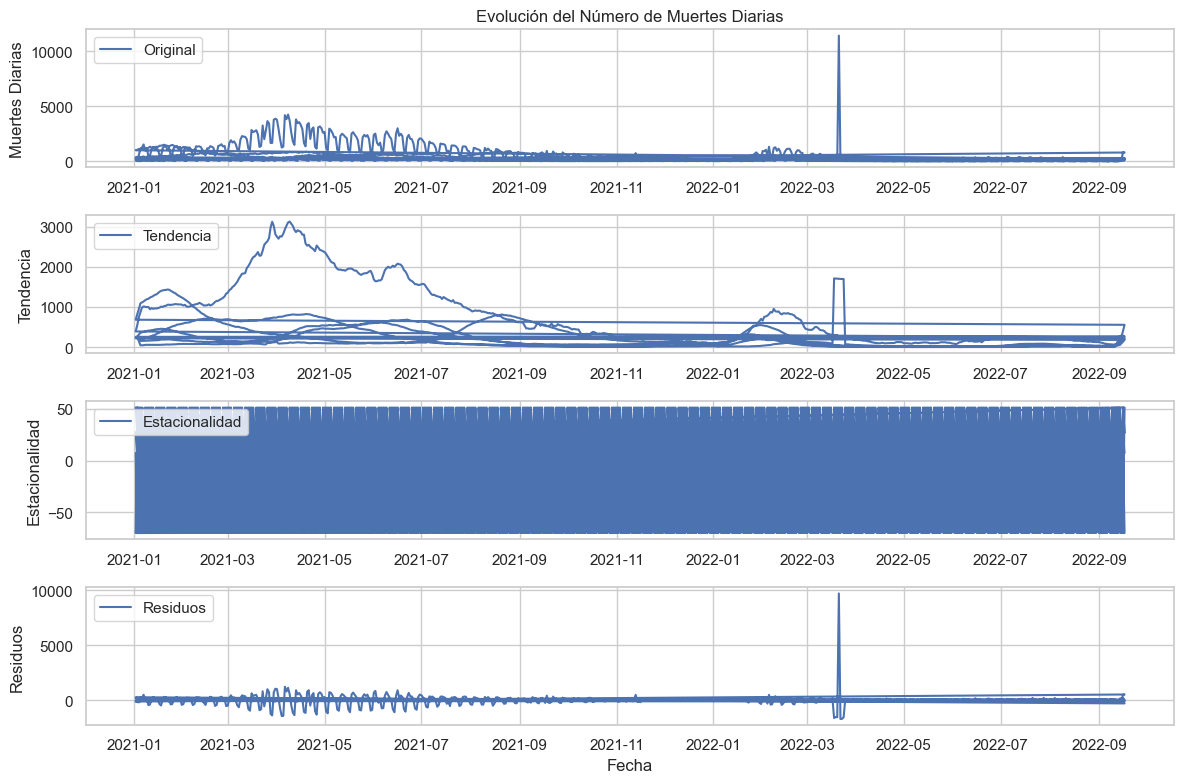

In [ ]:
# Filtrar datos relevantes para la evolución de muertes diarias
deaths_data = df[['date', 'new_deceased']].copy()

# Convertir la columna 'date' a tipo datetime si no está en ese formato
deaths_data['date'] = pd.to_datetime(deaths_data['date'])

# Establecer la columna 'date' como índice del DataFrame
deaths_data.set_index('date', inplace=True)

# Descomponer la serie temporal de muertes diarias en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(deaths_data['new_deceased'], model='additive', period=7)  # Suponiendo estacionalidad semanal

# Graficar la descomposición
plt.figure(figsize=(12, 8))

# Serie original de muertes diarias
plt.subplot(4, 1, 1)
plt.plot(deaths_data, label='Original')
plt.title('Evolución del Número de Muertes Diarias')
plt.ylabel('Muertes Diarias')
plt.legend(loc='upper left')

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia')
plt.ylabel('Tendencia')
plt.legend(loc='upper left')

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.ylabel('Estacionalidad')
plt.legend(loc='upper left')

# Residuos
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuos')
plt.ylabel('Residuos')
plt.xlabel('Fecha')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

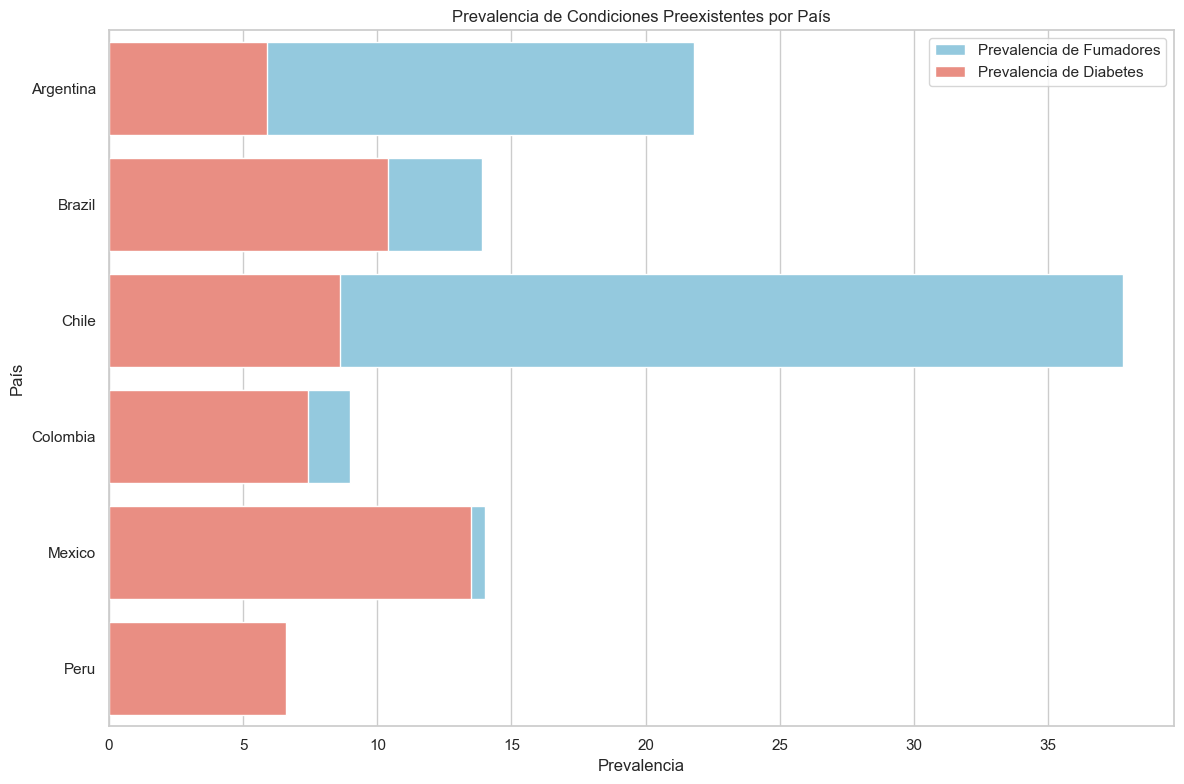

In [ ]:
#Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
# Calcular la prevalencia promedio de condiciones preexistentes por país
prevalencia_condiciones_paises = df.groupby('country_name')[['smoking_prevalence', 'diabetes_prevalence']].mean()

# Resetear el índice para que 'country_name' sea una columna nuevamente
prevalencia_condiciones_paises.reset_index(inplace=True)

# Usar Seaborn para el gráfico de barras no apilado por países
plt.figure(figsize=(12, 8))
sns.barplot(x='smoking_prevalence', y='country_name', data=prevalencia_condiciones_paises, color='skyblue', label='Prevalencia de Fumadores')
sns.barplot(x='diabetes_prevalence', y='country_name', data=prevalencia_condiciones_paises, color='salmon', label='Prevalencia de Diabetes')
plt.xlabel('Prevalencia')
plt.ylabel('País')
plt.title('Prevalencia de Condiciones Preexistentes por País')
plt.legend()
plt.tight_layout()
plt.show()

Chile tiene la mayor cantidad en fumadores de su poblacion y Mexico en prevalencia de diabetes. 

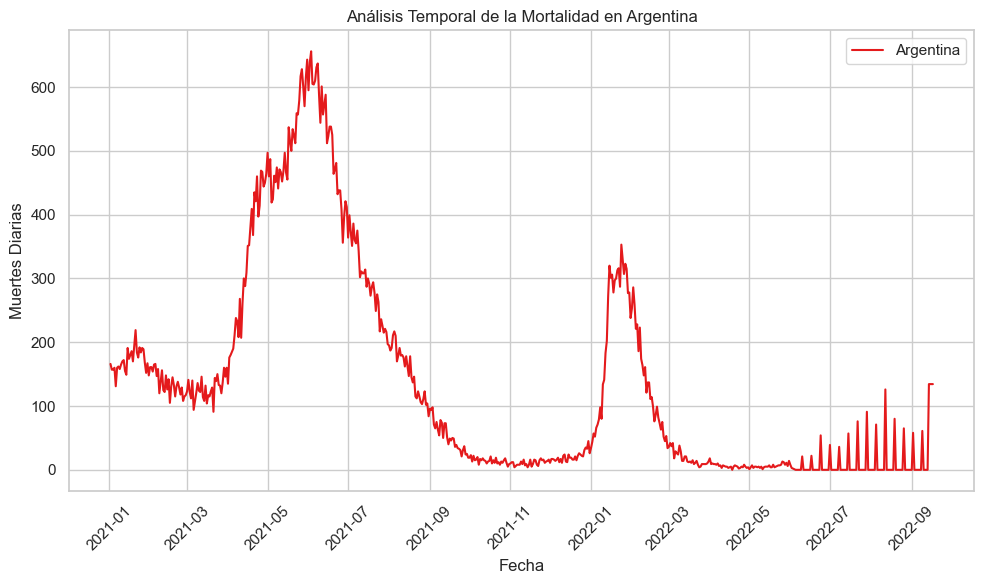

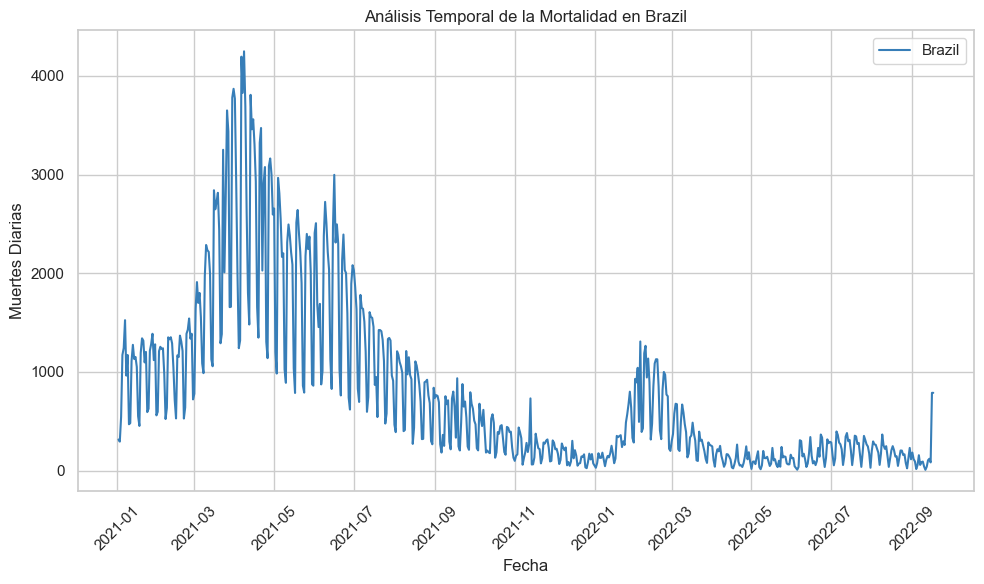

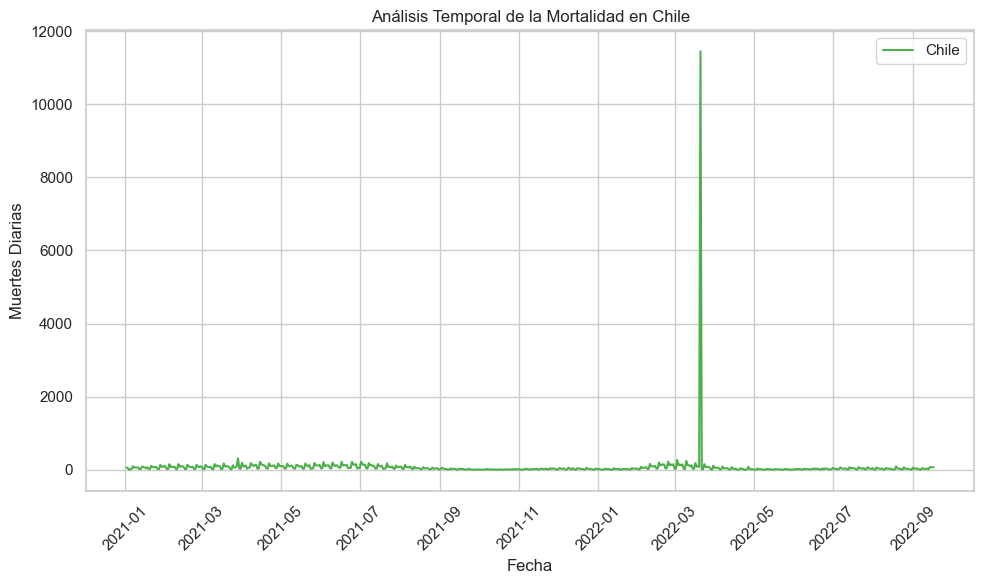

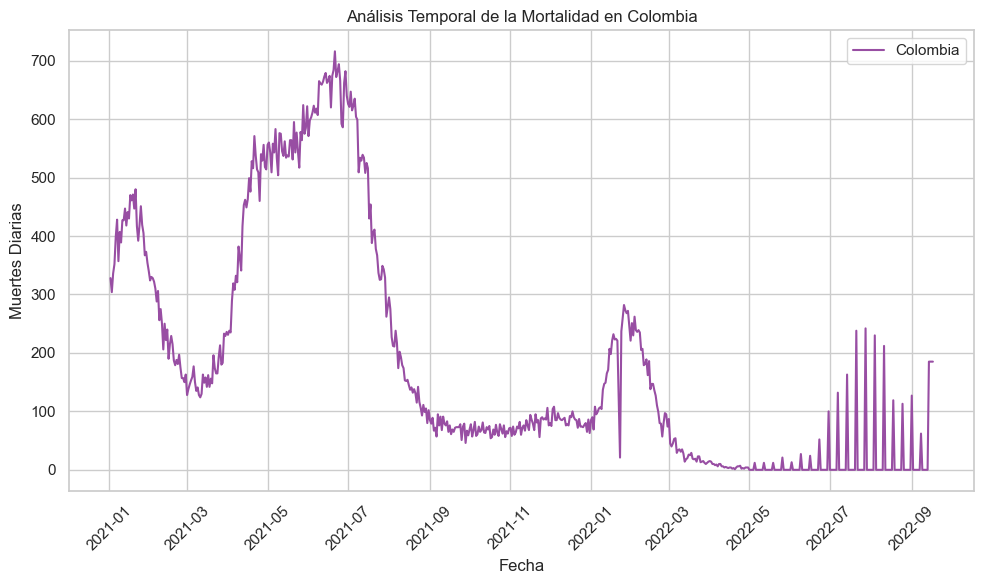

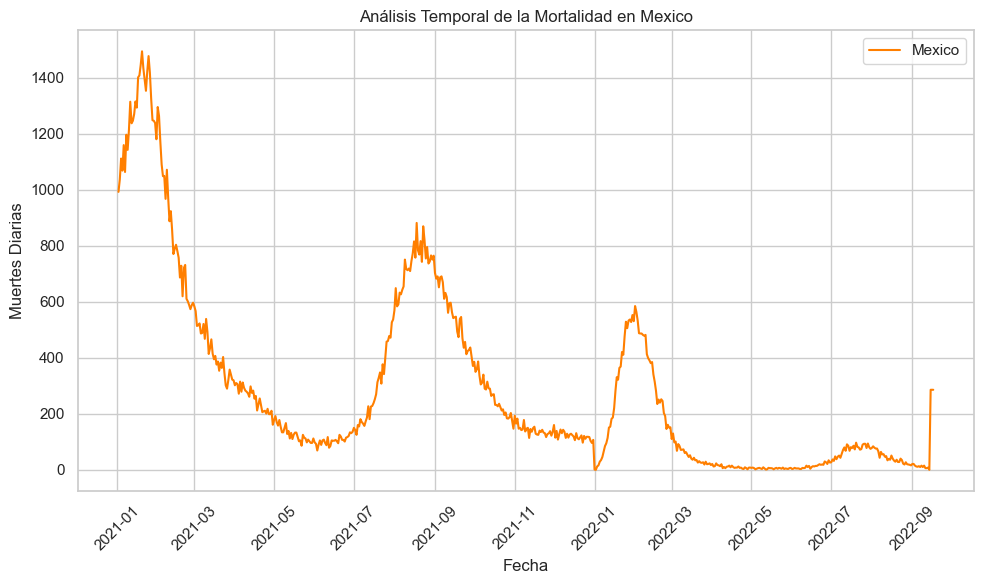

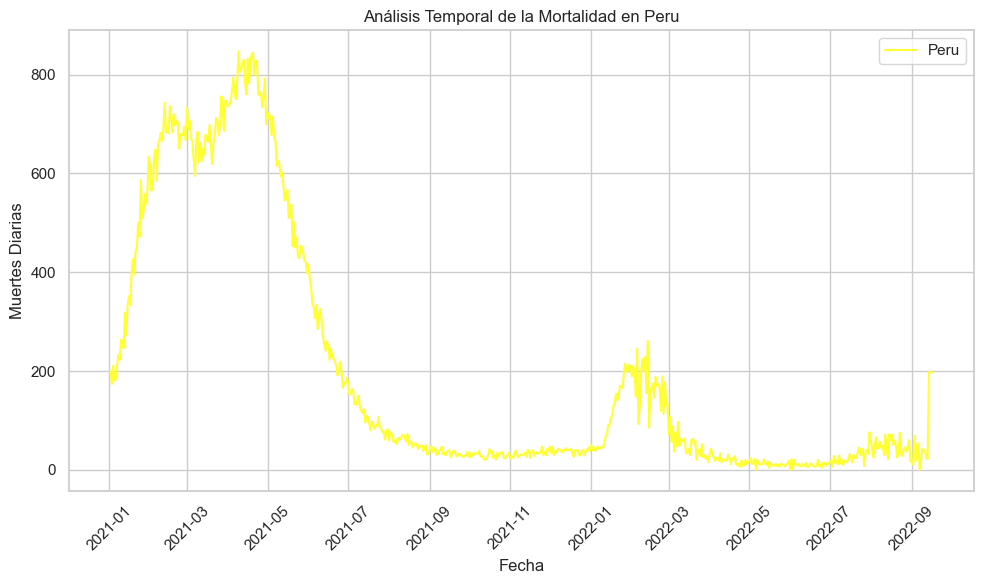

In [ ]:
#Analisis temporal de la mortalidad
# Convertir la columna 'date' a tipo datetime si no está en ese formato
df['date'] = pd.to_datetime(df['date'])

# Obtener la lista de países únicos
paises_unicos = df['country_name'].unique()

# Crear un gráfico de línea para cada país con un color diferente
for i, pais in enumerate(paises_unicos):
    # Filtrar los datos solo para el país actual
    data_pais = df[df['country_name'] == pais]
    
    # Agrupar los datos por fecha y sumar las muertes diarias
    daily_deaths_by_country = data_pais.groupby(['date'])['new_deceased'].sum().reset_index()
    
    # Asignar un color diferente a cada país
    color = sns.color_palette('Set1')[i]
    
    # Crear el gráfico de línea con Seaborn para el país actual
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='new_deceased', data=daily_deaths_by_country, label=pais, color=color)
    plt.title(f'Análisis Temporal de la Mortalidad en {pais}')
    plt.xlabel('Fecha')
    plt.ylabel('Muertes Diarias')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

En estos analisis temporales observamos que la mayoria de las muertes se presentan en los primeros meses del año del 2021, al parecer chile figura con una inconsistencia en sus datos porque muestra un pico de muertes en el mes de abril del 2022.

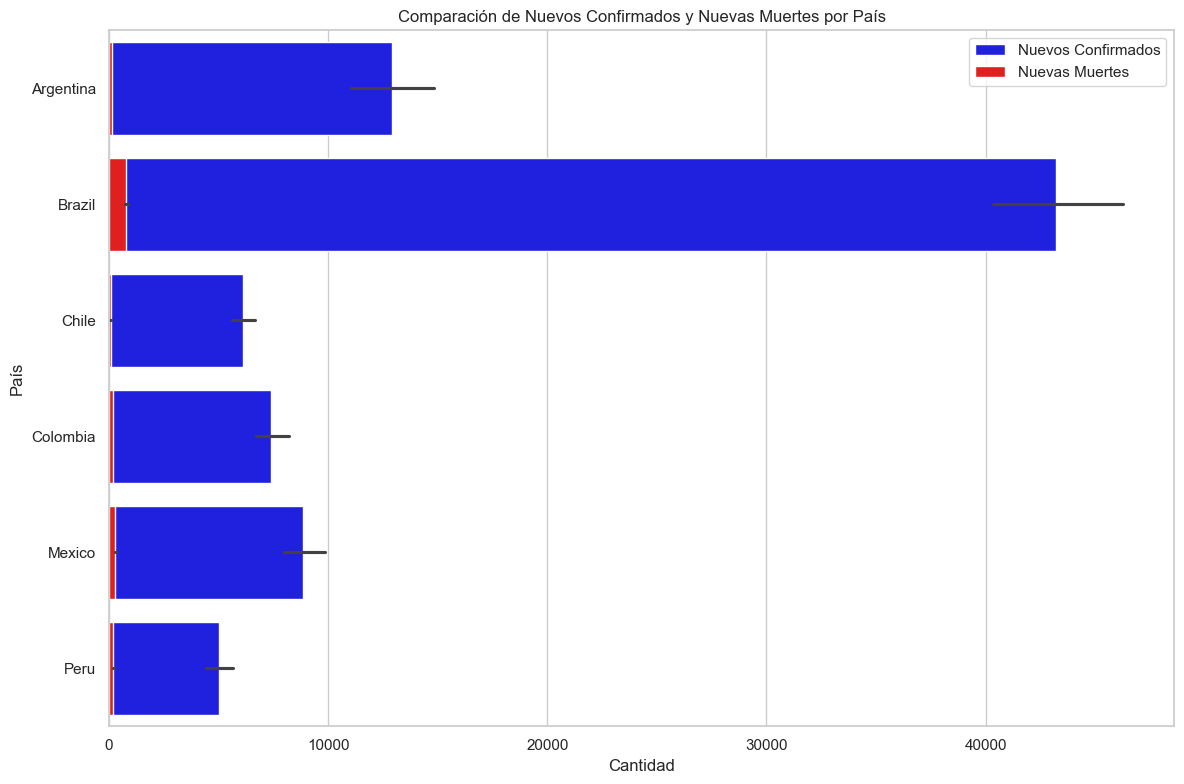

In [ ]:
#Comparación de la Situación Actual 
# Filtrar solo las columnas relevantes para la comparación
relevant_columns = ['country_name', 'new_confirmed', 'new_deceased']
data_to_plot = df[relevant_columns]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='new_confirmed', y='country_name', data=data_to_plot, color='blue', label='Nuevos Confirmados')
sns.barplot(x='new_deceased', y='country_name', data=data_to_plot, color='red', label='Nuevas Muertes')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.title('Comparación de Nuevos Confirmados y Nuevas Muertes por País')
plt.legend()
plt.tight_layout()
plt.show()

A nuevos contagiados, nuevas muertes. Pero se visualiza una gran cantidad de contagiados por un promedio muchisimo menor de muertes. 

## ExtraCredits

In [ ]:
#Mapa para ver la distribucion de casos confirmados, muertes,vacunas y recuperados
import folium
from folium.plugins import HeatMap
from folium import Tooltip  # Importar Tooltip correctamente

# Filtrar los datos necesarios
data_mapa = df[['latitude', 'longitude', 'cumulative_deceased', 'cumulative_recovered', 'country_name']]
data_mapa = data_mapa.dropna()  # Eliminar filas con valores nulos

# Crear el mapa centrado en una ubicación inicial
mapa = folium.Map(location=[0, 0], zoom_start=2)  # Puedes ajustar la ubicación y el zoom

# Crear capa de HeatMap para muertes
heat_map_muertes = HeatMap(data_mapa[['latitude', 'longitude', 'cumulative_deceased']], 
                           min_opacity=0.5, max_val=data_mapa['cumulative_deceased'].max(),
                           radius=15, blur=10, max_zoom=1, 
                           name='Muertes')

# Crear capa de HeatMap para recuperados
heat_map_recuperados = HeatMap(data_mapa[['latitude', 'longitude', 'cumulative_recovered']], 
                               min_opacity=0.5, max_val=data_mapa['cumulative_recovered'].max(),
                               radius=15, blur=10, max_zoom=1, 
                               name='Recuperados')

# Añadir las capas de HeatMap al mapa
mapa.add_child(heat_map_muertes)
mapa.add_child(heat_map_recuperados)

# Agregar información al pasar el cursor sobre el mapa
for _, row in data_mapa.iterrows():
    tooltip_text = f"<strong>{row['country_name']}</strong><br>"
    tooltip_text += f"Muertes: {int(row['cumulative_deceased']):,}<br>"
    tooltip = Tooltip(tooltip_text)
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip).add_to(mapa)

# Agregar control de capas (Layers Control)
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa

/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/3787816969.py:14: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map_muertes = HeatMap(data_mapa[['latitude', 'longitude', 'cumulative_deceased']],
/var/folders/3h/9j0406sx0f37c_4nn9n8f3280000gn/T/ipykernel_74750/3787816969.py:20: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map_recuperados = HeatMap(data_mapa[['latitude', 'longitude', 'cumulative_recovered']],


In [ ]:
data_latinoamerica_paises.to_csv('DatosFinalesFiltrado1.csv', index=False)
df.to_csv('DatosFinalesFiltrado2.csv', index=False)